In [2]:
# Mount into drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
# Free colab seems to give different amount of general RAM to different users or even the same users at different times.
!free -h

# check which nvidia drivers and cuda version is running
!nvidia-smi
!nvidia-smi -L

               total        used        free      shared  buff/cache   available
Mem:            50Gi       613Mi        46Gi       1.0Mi       3.8Gi        49Gi
Swap:             0B          0B          0B
Mon Apr 29 14:14:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              23W / 300W

In [3]:
# need to match the system-wide installed cuda-11 for deepspeed to compile
# so install the matching pytorch

# pt-1.8.1 works too
# !pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

# pt-1.11
#!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

!pip install torch==2.2.1+cu121 torchvision==0.17.1+cu121 torchaudio==2.2.1+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu121/torch_stable.html
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_

In [4]:
# either install the release
#!pip install deepspeed
# or the master
!pip install git+https://github.com/microsoft/deepspeed

# remove any previously cached deepspeed objects as they can be incompatible with this new build
#!rm -r /root/.cache/torch_extensions/

  Cloning https://github.com/microsoft/deepspeed to /tmp/pip-req-build-v8rigpx0
  Running command git clone --filter=blob:none --quiet https://github.com/microsoft/deepspeed /tmp/pip-req-build-v8rigpx0
  Resolved https://github.com/microsoft/deepspeed to commit 4c15ad9f8d51a1950842c69bbbc9d93c73afbcfc
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.5 MB/s eta 0:00:00
  Created wheel for deepspeed: filename=deepspeed-0.14.3+4c15ad9f-py3-none-any.whl size=1437492 sha256=adec2142312de20865367175848bab32fe41ac08ef473091f405535b7c35d455
  Stored in directory: /tmp/pip-ephem-wheel-cache-d2hqj7ty/wheels/c7/2a/60/6cd1be5e9093337b6243efab085ade35b787b5c4c1aaf99387
Successfully built deepspeed


In [5]:
!pip install datasets
!pip install evaluate==0.3.0
!pip install transformers==4.30.0
!pip install accelerate==0.27.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled toke

In [6]:
import torch
print(torch.cuda.device_count())
print(torch.cuda.is_available())

1
True


In [ ]:
# ICL experiment (original)
# bash $PROJECT_DIR/scripts/in_context/mnli/run_gpt3.sh mnli 16 facebook/opt-30b 1 60000
# Train custom model
#!python eval.py --task_name mnli --num_shots 2 --model_name_or_path facebook/opt-125m --pattern "{text1} {text2} ?" --target_prefix " " --target_tokens "ĠYes,ĠNo" --separate_shots_by "\n\n" --group "minimal" --max_seq_length 2048 --output_dir "./output" --do_eval --eval_task_name "hans" --per_device_eval_batch_size 10 --balanced --shuffle --seed 0 --data_seed 0 --dataset_cache_dir "./hf_dataset" --cache_dir "./hf_model" --report_to "none"
!python /content/drive/MyDrive/Colab-Notebooks/cs7643-prj/llmft/eval.py \
        --model_name_or_path facebook/opt-125m \
        --cache_dir "./hf_model" \
        --task_name mnli \
        --pattern "{text1} question: {text2} Yes or No?" \
        --target_prefix " answer: " \
        --target_tokens "ĠYes,ĠNo" \
        --separate_shots_by "\n\n" \
        --group "gpt-3" \
        --dataset_cache_dir "./hf_dataset" \
        --max_seq_length 2048 \
        --output_dir "./output" \
        --do_eval  \
        --eval_task_name "hans" \
        --per_device_eval_batch_size 10 \
        --num_shots 16 \
        --balanced \
        --shuffle \
        --fp16 \
        --seed 0 \
        --data_seed 0 \
        --report_to "none"


2024-04-07 15:10:27.376151: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-07 15:10:27.376202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-07 15:10:27.510668: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-07 15:10:28.843337: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[2024-04-07 15:10:37,429] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  async_io: pleas

In [ ]:
# FT experiment (original)
# args: task_name, max_train_samples, epochs, warmup_ratio, bsz, num_gpus, learning_rate, model_name_or_path, port
#bash $PROJECT_DIR/scripts/pattern_verbalizer_ft/mnli/run.sh mnli 128 40 0.5 4 8 1e-5 facebook/opt-13b 60000

import os
os.environ['PROJECT_DIR']="/content/drive/MyDrive/Colab-Notebooks/cs7643-prj/llmft"
#os.environ['WANDB_DISABLED']='False'

!python /content/drive/MyDrive/Colab-Notebooks/cs7643-prj/llmft/ft.py \
            --wandb_project_name llmft-experiments \
            --wandb_group_name vanilla-ft \
            --model_name_or_path facebook/opt-125m \
            --cache_dir "./hf_model" \
            --task_name mnli \
            --pattern "{text1} {text2} ?" \
            --dataset_cache_dir "./hf_dataset" \
            --max_seq_length 256 \
            --output_dir "./output" \
            --overwrite_output_dir \
            --do_train \
            --max_train_samples 16 \
            --per_device_train_batch_size 4 \
            --gradient_accumulation_steps 1 \
            --num_train_epochs 40 \
            --warmup_ratio 0.5 \
            --logging_first_step false \
            --logging_steps -1 \
            --learning_rate 1e-5 \
            --weight_decay 0.0 \
            --do_eval \
            --evaluation_strategy epoch \
            --per_device_eval_batch_size 10 \
            --eval_on_hans \
            --save_strategy no \
            --fp16 \
            --seed 0 \
            --data_seed 0 \
            --report_to "none" \
            2> /content/drive/MyDrive/Colab-Notebooks/cs7643-prj/llmft/logs/console.err


[2024-04-07 07:36:05,707] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  async_io: please install the libaio-dev package with apt
 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH
 [WARNING]  NVIDIA Inference is only supported on Ampere and newer architectures
 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.2
 [WARNING]  using untested triton version (2.2.0), only 1.0.0 is known to be compatible
Sample 98 of the training set: {'premise': "you know Uncle Sam but i've always thought that they were slow  as far as outside of the government you know", 'hypothesis': "My personal opinion is that they've always been fast."

In [ ]:
# FT+ experiment (context distillation with language model head)
# args: task_name, max_train_samples, epochs, warmup_ratio, bsz, num_gpus, learning_rate, model_name_or_path, port
#bash $PROJECT_DIR/scripts/pattern_verbalizer_ft/mnli/run.sh mnli 128 40 0.5 4 8 1e-5 facebook/opt-13b 60000

import os
os.environ['PROJECT_DIR']="/content/drive/MyDrive/Colab-Notebooks/cs7643-prj/llmft"
#os.environ['WANDB_DISABLED']='False'

!python /content/drive/MyDrive/Colab-Notebooks/cs7643-prj/llmft/ft.py \
            --wandb_project_name llmft-experiments \
            --wandb_group_name vanilla-ft \
            --model_name_or_path facebook/opt-125m \
            --cache_dir "./hf_model" \
            --task_name mnli \
            --pattern "{text1} {text2} ?" \
            --target_tokens "Ġ1,Ġ0" \
            --dataset_cache_dir "./hf_dataset" \
            --max_seq_length 256 \
            --output_dir "./output" \
            --overwrite_output_dir \
            --do_train \
            --max_train_samples 16 \
            --per_device_train_batch_size 16 \
            --gradient_accumulation_steps 1 \
            --num_train_epochs 50 \
            --warmup_ratio 0.5 \
            --logging_first_step false \
            --logging_steps -1 \
            --learning_rate 1e-4 \
            --weight_decay 0.0 \
            --do_eval \
            --evaluation_strategy epoch \
            --per_device_eval_batch_size 32 \
            --eval_on_hans \
            --save_strategy no \
            --fp16 \
            --seed 0 \
            --data_seed 0 \
            --report_to "none" \
            2> /content/drive/MyDrive/Colab-Notebooks/cs7643-prj/llmft/logs/console.err


[2024-04-25 01:32:21,802] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  async_io: please install the libaio-dev package with apt
 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH
 [WARNING]  NVIDIA Inference is only supported on Ampere and newer architectures
 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.2
 [WARNING]  using untested triton version (2.2.0), only 1.0.0 is known to be compatible
Sample 12 of the training set: {'premise': 'and it is really really good about the um Saudis and just tracking their families and the Arabian culture', 'hypothesis': 'It often loses track of certain Saudis.', 'label': 321, '

Experiment with seed 42

In [ ]:
# FT+ experiment (context distillation with language model head)
# args: task_name, max_train_samples, epochs, warmup_ratio, bsz, num_gpus, learning_rate, model_name_or_path, port
#bash $PROJECT_DIR/scripts/pattern_verbalizer_ft/mnli/run.sh mnli 128 40 0.5 4 8 1e-5 facebook/opt-13b 60000

import os
os.environ['PROJECT_DIR']="/content/drive/Othercomputers/My Computer/GoogleDrive/cs7643-prj-0407/llmft"
# os.environ['PROJECT_DIR']="/content/drive/MyDrive/Colab-Notebooks/cs7643-prj/llmft"
# os.environ['WANDB_DISABLED']='False'

!python "${PROJECT_DIR}/ft.py" \
            --wandb_project_name llmft-experiments \
            --wandb_group_name vanilla-ft \
            --model_name_or_path facebook/opt-125m \
            --cache_dir "./hf_model" \
            --task_name mnli \
            --pattern "{text1} {text2} ?" \
            --target_tokens "Ġ1,Ġ0" \
            --dataset_cache_dir "./hf_dataset" \
            --max_seq_length 256 \
            --output_dir "./output" \
            --overwrite_output_dir \
            --do_train \
            --max_train_samples 16 \
            --per_device_train_batch_size 16 \
            --gradient_accumulation_steps 1 \
            --num_train_epochs 50 \
            --warmup_ratio 0.5 \
            --logging_first_step false \
            --logging_steps -1 \
            --learning_rate 1e-4 \
            --weight_decay 0.0 \
            --do_eval \
            --evaluation_strategy epoch \
            --per_device_eval_batch_size 32 \
            --eval_on_hans \
            --save_strategy no \
            --fp16 \
            --seed 42 \
            --data_seed 42 \
            --report_to "none" \
            2> "${PROJECT_DIR}/console.err"


[2024-04-27 02:03:30,300] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  async_io: please install the libaio-dev package with apt
 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH
 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.2
 [WARNING]  using untested triton version (2.2.0), only 1.0.0 is known to be compatible
Sample 3 of the training set: {'premise': 'In defining the specific categories of items, or elements, that would appear as stewardship information, the Board decided on the ', 'hypothesis': 'There are specific categories of items and elements to be determined.', 'label': 112, 'idx': 226132, 'input_ids': 

Experiment with seed 1

In [ ]:
# FT+ experiment (context distillation with language model head)
# args: task_name, max_train_samples, epochs, warmup_ratio, bsz, num_gpus, learning_rate, model_name_or_path, port
#bash $PROJECT_DIR/scripts/pattern_verbalizer_ft/mnli/run.sh mnli 128 40 0.5 4 8 1e-5 facebook/opt-13b 60000

import os
os.environ['PROJECT_DIR']="/content/drive/Othercomputers/My Computer/GoogleDrive/cs7643-prj-0407/llmft"
# os.environ['PROJECT_DIR']="/content/drive/MyDrive/Colab-Notebooks/cs7643-prj/llmft"
# os.environ['WANDB_DISABLED']='False'

!python "${PROJECT_DIR}/ft.py" \
            --wandb_project_name llmft-experiments \
            --wandb_group_name vanilla-ft \
            --model_name_or_path facebook/opt-125m \
            --cache_dir "./hf_model" \
            --task_name mnli \
            --pattern "{text1} {text2} ?" \
            --target_tokens "Ġ1,Ġ0" \
            --dataset_cache_dir "./hf_dataset" \
            --max_seq_length 256 \
            --output_dir "./output" \
            --overwrite_output_dir \
            --do_train \
            --max_train_samples 16 \
            --per_device_train_batch_size 16 \
            --gradient_accumulation_steps 1 \
            --num_train_epochs 50 \
            --warmup_ratio 0.5 \
            --logging_first_step false \
            --logging_steps -1 \
            --learning_rate 1e-4 \
            --weight_decay 0.0 \
            --do_eval \
            --evaluation_strategy epoch \
            --per_device_eval_batch_size 32 \
            --eval_on_hans \
            --save_strategy no \
            --fp16 \
            --seed 1 \
            --data_seed 1 \
            --report_to "none" \
            2> "${PROJECT_DIR}/console.err"


[2024-04-27 11:51:45,192] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  async_io: please install the libaio-dev package with apt
 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH
 [WARNING]  NVIDIA Inference is only supported on Ampere and newer architectures
 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.2
 [WARNING]  using untested triton version (2.2.0), only 1.0.0 is known to be compatible
Sample 4 of the training set: {'premise': "113 Chapter 14 A Consultation NOTHING was more surprising and bewildering to Tuppence than the ease and simplicity with which everything was arranged, owing to Sir James's skilful h

In [32]:
res_0 = [
    {'eval_hans-lexical_overlap-entailment_loss': 8.40011215209961, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 86.7662, 'eval_hans-lexical_overlap-entailment_samples_per_second': 57.626, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.809, 'epoch': 1.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 9.86875057220459, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 90.1957, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 55.435, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.741, 'epoch': 1.0},
    {'eval_mnli_loss': 9.576363563537598, 'eval_mnli_accuracy': 0.0, 'eval_mnli_frac_non_target_tokens': 1.0, 'eval_mnli_runtime': 122.0965, 'eval_mnli_samples_per_second': 54.809, 'eval_mnli_steps_per_second': 1.72, 'epoch': 1.0},
    {'eval_hans-lexical_overlap-entailment_loss': 7.98378849029541, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 91.7688, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.485, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.711, 'epoch': 2.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 9.310144424438477, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 91.8509, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.436, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.709, 'epoch': 2.0},
    {'eval_mnli_loss': 8.996858596801758, 'eval_mnli_accuracy': 0.0, 'eval_mnli_frac_non_target_tokens': 1.0, 'eval_mnli_runtime': 124.7281, 'eval_mnli_samples_per_second': 53.653, 'eval_mnli_steps_per_second': 1.684, 'epoch': 2.0},
    {'eval_hans-lexical_overlap-entailment_loss': 7.109692096710205, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.0503, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.318, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.706, 'epoch': 3.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 8.148530006408691, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 91.9744, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.363, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.707, 'epoch': 3.0},
    {'eval_mnli_loss': 7.785257339477539, 'eval_mnli_accuracy': 0.0, 'eval_mnli_frac_non_target_tokens': 1.0, 'eval_mnli_runtime': 124.7398, 'eval_mnli_samples_per_second': 53.648, 'eval_mnli_steps_per_second': 1.684, 'epoch': 3.0},
    {'eval_hans-lexical_overlap-entailment_loss': 5.733150959014893, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.1175, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.279, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.704, 'epoch': 4.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 6.266875743865967, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.0197, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.336, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.706, 'epoch': 4.0},
    {'eval_mnli_loss': 5.827611446380615, 'eval_mnli_accuracy': 0.00014943215780035862, 'eval_mnli_frac_non_target_tokens': 0.9994022713687986, 'eval_mnli_runtime': 124.6708, 'eval_mnli_samples_per_second': 53.677, 'eval_mnli_steps_per_second': 1.684, 'epoch': 4.0},
    {'eval_hans-lexical_overlap-entailment_loss': 4.1217570304870605, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.212, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.223, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.703, 'epoch': 5.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 3.984360933303833, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0002, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.9998, 'eval_hans-lexical_overlap-contradiction_runtime': 92.2063, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.226, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.703, 'epoch': 5.0},
    {'eval_mnli_loss': 3.7195076942443848, 'eval_mnli_accuracy': 0.06186491332934847, 'eval_mnli_frac_non_target_tokens': 0.8469814704124328, 'eval_mnli_runtime': 124.5777, 'eval_mnli_samples_per_second': 53.717, 'eval_mnli_steps_per_second': 1.686, 'epoch': 5.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.621020793914795, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.1312, 'eval_hans-lexical_overlap-entailment_runtime': 92.184, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.239, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.703, 'epoch': 6.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 1.8138121366500854, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.8582, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.1418, 'eval_hans-lexical_overlap-contradiction_runtime': 92.1626, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.252, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.704, 'epoch': 6.0},
    {'eval_mnli_loss': 2.145681381225586, 'eval_mnli_accuracy': 0.43544530783024504, 'eval_mnli_frac_non_target_tokens': 0.09847579199043634, 'eval_mnli_runtime': 124.7194, 'eval_mnli_samples_per_second': 53.656, 'eval_mnli_steps_per_second': 1.684, 'epoch': 6.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.052823543548584, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.3289, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.154, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.7, 'epoch': 7.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.5313386917114258, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.2453, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.203, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.702, 'epoch': 7.0},
    {'eval_mnli_loss': 1.494421124458313, 'eval_mnli_accuracy': 0.4739988045427376, 'eval_mnli_frac_non_target_tokens': 0.012851165570830842, 'eval_mnli_runtime': 124.5997, 'eval_mnli_samples_per_second': 53.708, 'eval_mnli_steps_per_second': 1.685, 'epoch': 7.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.8652607202529907, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 91.9794, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.36, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.707, 'epoch': 8.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.2923048436641693, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.213, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.222, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.703, 'epoch': 8.0},
    {'eval_mnli_loss': 1.3116265535354614, 'eval_mnli_accuracy': 0.47982665869695157, 'eval_mnli_frac_non_target_tokens': 0.0005977286312014345, 'eval_mnli_runtime': 124.5456, 'eval_mnli_samples_per_second': 53.731, 'eval_mnli_steps_per_second': 1.686, 'epoch': 8.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.3058369159698486, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.0322, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.329, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.706, 'epoch': 9.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.3935530185699463, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.2736, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.187, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.701, 'epoch': 9.0},
    {'eval_mnli_loss': 0.9882767796516418, 'eval_mnli_accuracy': 0.4802749551703527, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.278, 'eval_mnli_samples_per_second': 53.847, 'eval_mnli_steps_per_second': 1.69, 'epoch': 9.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.43956610560417175, 'eval_hans-lexical_overlap-entailment_accuracy': 0.986, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.0793, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.301, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.705, 'epoch': 10.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 1.1361697912216187, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0188, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.1274, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.273, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.704, 'epoch': 10.0},
    {'eval_mnli_loss': 0.7197386622428894, 'eval_mnli_accuracy': 0.5657501494321578, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.5574, 'eval_mnli_samples_per_second': 53.726, 'eval_mnli_steps_per_second': 1.686, 'epoch': 10.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.53426593542099, 'eval_hans-lexical_overlap-entailment_accuracy': 0.8556, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.3786, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.125, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.7, 'epoch': 11.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.9795607328414917, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.1254, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.1786, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.243, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.703, 'epoch': 11.0},
    {'eval_mnli_loss': 0.7233008146286011, 'eval_mnli_accuracy': 0.5527495517035266, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.9816, 'eval_mnli_samples_per_second': 53.544, 'eval_mnli_steps_per_second': 1.68, 'epoch': 11.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.4858394861221313, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0114, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.3178, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.161, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.701, 'epoch': 12.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.32263967394828796, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9782, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.2589, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.195, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.702, 'epoch': 12.0},
    {'eval_mnli_loss': 1.1477530002593994, 'eval_mnli_accuracy': 0.4887925881649731, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.6916, 'eval_mnli_samples_per_second': 53.668, 'eval_mnli_steps_per_second': 1.684, 'epoch': 12.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.876326560974121, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0044, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.183, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.24, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.703, 'epoch': 13.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.22709526121616364, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.992, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.3129, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.164, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.701, 'epoch': 13.0},
    {'eval_mnli_loss': 1.4672433137893677, 'eval_mnli_accuracy': 0.4849073520621638, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.7404, 'eval_mnli_samples_per_second': 53.647, 'eval_mnli_steps_per_second': 1.683, 'epoch': 13.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.2615259885787964, 'eval_hans-lexical_overlap-entailment_accuracy': 0.1604, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.0579, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.314, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.705, 'epoch': 14.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.4806351661682129, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.7924, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.1999, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.23, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.703, 'epoch': 14.0},
    {'eval_mnli_loss': 1.2916499376296997, 'eval_mnli_accuracy': 0.5011954572624029, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.4207, 'eval_mnli_samples_per_second': 53.785, 'eval_mnli_steps_per_second': 1.688, 'epoch': 14.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.4793790578842163, 'eval_hans-lexical_overlap-entailment_accuracy': 0.1686, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.0786, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.301, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.705, 'epoch': 15.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.4627358913421631, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.782, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.1579, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.255, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.704, 'epoch': 15.0},
    {'eval_mnli_loss': 1.6303374767303467, 'eval_mnli_accuracy': 0.49940227136879856, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.633, 'eval_mnli_samples_per_second': 53.694, 'eval_mnli_steps_per_second': 1.685, 'epoch': 15.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.3848443031311035, 'eval_hans-lexical_overlap-entailment_accuracy': 0.062, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.0955, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.291, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.705, 'epoch': 16.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.25967657566070557, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9036, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.031, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.33, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.706, 'epoch': 16.0},
    {'eval_mnli_loss': 2.3880341053009033, 'eval_mnli_accuracy': 0.494172145845786, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.5395, 'eval_mnli_samples_per_second': 53.734, 'eval_mnli_steps_per_second': 1.686, 'epoch': 16.0},
    {'eval_hans-lexical_overlap-entailment_loss': 4.399971961975098, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0056, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.001, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.347, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.707, 'epoch': 17.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.06301162391901016, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9904, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.0311, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.329, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.706, 'epoch': 17.0},
    {'eval_mnli_loss': 3.6369895935058594, 'eval_mnli_accuracy': 0.48565451285116557, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.5353, 'eval_mnli_samples_per_second': 53.736, 'eval_mnli_steps_per_second': 1.686, 'epoch': 17.0},
    {'eval_hans-lexical_overlap-entailment_loss': 5.027885437011719, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0136, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.119, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.278, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.704, 'epoch': 18.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.06919288635253906, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9814, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.1447, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.262, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.704, 'epoch': 18.0},
    {'eval_mnli_loss': 4.128033638000488, 'eval_mnli_accuracy': 0.4917812313209803, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.7686, 'eval_mnli_samples_per_second': 53.635, 'eval_mnli_steps_per_second': 1.683, 'epoch': 18.0},
    {'eval_hans-lexical_overlap-entailment_loss': 4.7412028312683105, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0426, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 91.9675, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.367, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.707, 'epoch': 19.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.14688417315483093, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.94, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.0916, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.294, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.705, 'epoch': 19.0},
    {'eval_mnli_loss': 4.214592933654785, 'eval_mnli_accuracy': 0.49611476389719067, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.5991, 'eval_mnli_samples_per_second': 53.708, 'eval_mnli_steps_per_second': 1.685, 'epoch': 19.0},
    {'eval_hans-lexical_overlap-entailment_loss': 6.115717887878418, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0252, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.2389, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.207, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.702, 'epoch': 20.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.098166823387146, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9606, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.1102, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.283, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.704, 'epoch': 20.0},
    {'eval_mnli_loss': 5.169158935546875, 'eval_mnli_accuracy': 0.4931261207411835, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.8599, 'eval_mnli_samples_per_second': 53.596, 'eval_mnli_steps_per_second': 1.682, 'epoch': 20.0},
    {'eval_hans-lexical_overlap-entailment_loss': 7.155056476593018, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0238, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.1775, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.243, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.703, 'epoch': 21.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.0963006466627121, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.961, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.0359, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.327, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.706, 'epoch': 21.0},
    {'eval_mnli_loss': 5.905972003936768, 'eval_mnli_accuracy': 0.4919306634787806, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.6019, 'eval_mnli_samples_per_second': 53.707, 'eval_mnli_steps_per_second': 1.685, 'epoch': 21.0},
    {'eval_hans-lexical_overlap-entailment_loss': 8.793815612792969, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0148, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.0675, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.308, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.705, 'epoch': 22.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.05870635807514191, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9768, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.09, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.295, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.705, 'epoch': 22.0},
    {'eval_mnli_loss': 6.767853736877441, 'eval_mnli_accuracy': 0.4887925881649731, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.5646, 'eval_mnli_samples_per_second': 53.723, 'eval_mnli_steps_per_second': 1.686, 'epoch': 22.0},
    {'eval_hans-lexical_overlap-entailment_loss': 10.503881454467773, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0088, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 91.9983, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.349, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.707, 'epoch': 23.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.033334724605083466, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9864, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 91.9129, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.399, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.708, 'epoch': 23.0},
    {'eval_mnli_loss': 7.582984924316406, 'eval_mnli_accuracy': 0.48640167364016734, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.6935, 'eval_mnli_samples_per_second': 53.668, 'eval_mnli_steps_per_second': 1.684, 'epoch': 23.0},
    {'eval_hans-lexical_overlap-entailment_loss': 11.908713340759277, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0054, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.1399, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.265, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.704, 'epoch': 24.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.021074999123811722, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9924, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.0003, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.348, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.707, 'epoch': 24.0},
    {'eval_mnli_loss': 8.18591022491455, 'eval_mnli_accuracy': 0.4849073520621638, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.62, 'eval_mnli_samples_per_second': 53.699, 'eval_mnli_steps_per_second': 1.685, 'epoch': 24.0},
    {'eval_hans-lexical_overlap-entailment_loss': 10.421285629272461, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0206, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.0815, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.3, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.705, 'epoch': 25.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.08722405135631561, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9666, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.0851, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.298, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.705, 'epoch': 25.0},
    {'eval_mnli_loss': 7.682288646697998, 'eval_mnli_accuracy': 0.49013747758517634, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.6199, 'eval_mnli_samples_per_second': 53.699, 'eval_mnli_steps_per_second': 1.685, 'epoch': 25.0},
    {'eval_hans-lexical_overlap-entailment_loss': 8.15563678741455, 'eval_hans-lexical_overlap-entailment_accuracy': 0.07, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.1129, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.281, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.704, 'epoch': 26.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.3136690557003021, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.8984, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 91.7788, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.479, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.711, 'epoch': 26.0},
    {'eval_mnli_loss': 6.824244499206543, 'eval_mnli_accuracy': 0.4934249850567842, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.3158, 'eval_mnli_samples_per_second': 53.831, 'eval_mnli_steps_per_second': 1.689, 'epoch': 26.0},
    {'eval_hans-lexical_overlap-entailment_loss': 6.461817741394043, 'eval_hans-lexical_overlap-entailment_accuracy': 0.1228, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 91.8315, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.448, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.71, 'epoch': 27.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.6265707015991211, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.8178, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 91.8919, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.412, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.709, 'epoch': 27.0},
    {'eval_mnli_loss': 6.098943710327148, 'eval_mnli_accuracy': 0.4974596533173939, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.7561, 'eval_mnli_samples_per_second': 53.641, 'eval_mnli_steps_per_second': 1.683, 'epoch': 27.0},
    {'eval_hans-lexical_overlap-entailment_loss': 5.735737323760986, 'eval_hans-lexical_overlap-entailment_accuracy': 0.1528, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.2574, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.196, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.702, 'epoch': 28.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.8010339736938477, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.7748, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.1834, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.24, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.703, 'epoch': 28.0},
    {'eval_mnli_loss': 5.7231831550598145, 'eval_mnli_accuracy': 0.4977585176329946, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.2252, 'eval_mnli_samples_per_second': 53.87, 'eval_mnli_steps_per_second': 1.69, 'epoch': 28.0},
    {'eval_hans-lexical_overlap-entailment_loss': 7.21458101272583, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0956, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 91.9048, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.404, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.708, 'epoch': 29.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.46025633811950684, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.8562, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.0474, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.32, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.706, 'epoch': 29.0},
    {'eval_mnli_loss': 6.216178894042969, 'eval_mnli_accuracy': 0.4949193066347878, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.2872, 'eval_mnli_samples_per_second': 53.843, 'eval_mnli_steps_per_second': 1.69, 'epoch': 29.0},
    {'eval_hans-lexical_overlap-entailment_loss': 9.586128234863281, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0342, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 91.8779, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.42, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.709, 'epoch': 30.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.1586349904537201, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9404, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.2779, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.184, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.701, 'epoch': 30.0},
    {'eval_mnli_loss': 7.028809070587158, 'eval_mnli_accuracy': 0.49013747758517634, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.2012, 'eval_mnli_samples_per_second': 53.88, 'eval_mnli_steps_per_second': 1.691, 'epoch': 30.0},
    {'eval_hans-lexical_overlap-entailment_loss': 11.503235816955566, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0112, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 91.9939, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.351, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.707, 'epoch': 31.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.05258641391992569, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.979, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.3019, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.17, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.701, 'epoch': 31.0},
    {'eval_mnli_loss': 7.668882846832275, 'eval_mnli_accuracy': 0.48789599521817095, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.2593, 'eval_mnli_samples_per_second': 53.855, 'eval_mnli_steps_per_second': 1.69, 'epoch': 31.0},
    {'eval_hans-lexical_overlap-entailment_loss': 12.82470417022705, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0032, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.1719, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.246, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.703, 'epoch': 32.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.019402191042900085, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9932, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.2493, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.201, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.702, 'epoch': 32.0},
    {'eval_mnli_loss': 8.093835830688477, 'eval_mnli_accuracy': 0.4869994022713688, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.6845, 'eval_mnli_samples_per_second': 53.671, 'eval_mnli_steps_per_second': 1.684, 'epoch': 32.0},
    {'eval_hans-lexical_overlap-entailment_loss': 13.518975257873535, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0018, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.3752, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.127, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.7, 'epoch': 33.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.010118905454874039, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.996, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.0511, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.318, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.706, 'epoch': 33.0},
    {'eval_mnli_loss': 8.295318603515625, 'eval_mnli_accuracy': 0.4850567842199641, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.85, 'eval_mnli_samples_per_second': 53.6, 'eval_mnli_steps_per_second': 1.682, 'epoch': 33.0},
    {'eval_hans-lexical_overlap-entailment_loss': 13.258255004882812, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0028, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.3286, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.154, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.7, 'epoch': 34.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.015777673572301865, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9946, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.199, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.231, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.703, 'epoch': 34.0},
    {'eval_mnli_loss': 8.21270751953125, 'eval_mnli_accuracy': 0.486252241482367, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.8991, 'eval_mnli_samples_per_second': 53.579, 'eval_mnli_steps_per_second': 1.681, 'epoch': 34.0},
    {'eval_hans-lexical_overlap-entailment_loss': 12.607301712036133, 'eval_hans-lexical_overlap-entailment_accuracy': 0.007, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.2263, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.214, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.702, 'epoch': 35.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.031373217701911926, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9878, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.3991, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.113, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.699, 'epoch': 35.0},
    {'eval_mnli_loss': 7.997874736785889, 'eval_mnli_accuracy': 0.48670053795576806, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.864, 'eval_mnli_samples_per_second': 53.594, 'eval_mnli_steps_per_second': 1.682, 'epoch': 35.0},
    {'eval_hans-lexical_overlap-entailment_loss': 11.846973419189453, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0102, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.259, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.195, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.702, 'epoch': 36.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.05524592101573944, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.978, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.3105, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.165, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.701, 'epoch': 36.0},
    {'eval_mnli_loss': 7.723161697387695, 'eval_mnli_accuracy': 0.4877465630603706, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 125.0844, 'eval_mnli_samples_per_second': 53.5, 'eval_mnli_steps_per_second': 1.679, 'epoch': 36.0},
    {'eval_hans-lexical_overlap-entailment_loss': 11.016867637634277, 'eval_hans-lexical_overlap-entailment_accuracy': 0.018, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.4384, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.09, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.698, 'epoch': 37.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.09147239476442337, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9672, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.479, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.066, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.698, 'epoch': 37.0},
    {'eval_mnli_loss': 7.417838096618652, 'eval_mnli_accuracy': 0.48968918111177523, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 125.0722, 'eval_mnli_samples_per_second': 53.505, 'eval_mnli_steps_per_second': 1.679, 'epoch': 37.0},
    {'eval_hans-lexical_overlap-entailment_loss': 10.20132064819336, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0274, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.4139, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.104, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.699, 'epoch': 38.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.13795174658298492, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.952, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.7216, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.925, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.693, 'epoch': 38.0},
    {'eval_mnli_loss': 7.108367919921875, 'eval_mnli_accuracy': 0.49013747758517634, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 125.261, 'eval_mnli_samples_per_second': 53.424, 'eval_mnli_steps_per_second': 1.676, 'epoch': 38.0},
    {'eval_hans-lexical_overlap-entailment_loss': 9.466053009033203, 'eval_hans-lexical_overlap-entailment_accuracy': 0.037, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.7247, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.923, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.693, 'epoch': 39.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.1927150934934616, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9334, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.6925, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.942, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.694, 'epoch': 39.0},
    {'eval_mnli_loss': 6.82753849029541, 'eval_mnli_accuracy': 0.49267782426778245, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 125.4546, 'eval_mnli_samples_per_second': 53.342, 'eval_mnli_steps_per_second': 1.674, 'epoch': 39.0},
    {'eval_hans-lexical_overlap-entailment_loss': 8.954721450805664, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0444, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.6898, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.943, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.694, 'epoch': 40.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.23869843780994415, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9208, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.1612, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.253, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.704, 'epoch': 40.0},
    {'eval_mnli_loss': 6.6336140632629395, 'eval_mnli_accuracy': 0.4931261207411835, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 124.628, 'eval_mnli_samples_per_second': 53.696, 'eval_mnli_steps_per_second': 1.685, 'epoch': 40.0},
    {'eval_hans-lexical_overlap-entailment_loss': 9.104738235473633, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0412, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 92.102, 'eval_hans-lexical_overlap-entailment_samples_per_second': 54.288, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.705, 'epoch': 41.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 0.21844317018985748, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.926, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.0958, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.291, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.705, 'epoch': 41.0},
]

res_42 = [
    {'eval_hans-lexical_overlap-entailment_loss': 8.40011215209961, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5598, 'eval_hans-lexical_overlap-entailment_samples_per_second': 212.226, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.664, 'epoch': 1.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 9.86875057220459, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5313, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 212.483, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.672, 'epoch': 1.0},
    {'eval_mnli_loss': 9.576363563537598, 'eval_mnli_accuracy': 0.0, 'eval_mnli_frac_non_target_tokens': 1.0, 'eval_mnli_runtime': 31.4758, 'eval_mnli_samples_per_second': 212.608, 'eval_mnli_steps_per_second': 6.672, 'epoch': 1.0},
    {'eval_hans-lexical_overlap-entailment_loss': 7.894837379455566, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5831, 'eval_hans-lexical_overlap-entailment_samples_per_second': 212.016, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.657, 'epoch': 2.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 9.366314888000488, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.596, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.9, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.654, 'epoch': 2.0},
    {'eval_mnli_loss': 8.99833869934082, 'eval_mnli_accuracy': 0.0, 'eval_mnli_frac_non_target_tokens': 1.0, 'eval_mnli_runtime': 31.6032, 'eval_mnli_samples_per_second': 211.751, 'eval_mnli_steps_per_second': 6.645, 'epoch': 2.0},
    {'eval_hans-lexical_overlap-entailment_loss': 6.855311870574951, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5807, 'eval_hans-lexical_overlap-entailment_samples_per_second': 212.038, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.658, 'epoch': 3.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 8.336752891540527, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5827, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 212.02, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.657, 'epoch': 3.0},
    {'eval_mnli_loss': 7.805848598480225, 'eval_mnli_accuracy': 0.0, 'eval_mnli_frac_non_target_tokens': 1.0, 'eval_mnli_runtime': 31.6259, 'eval_mnli_samples_per_second': 211.599, 'eval_mnli_steps_per_second': 6.64, 'epoch': 3.0},
    {'eval_hans-lexical_overlap-entailment_loss': 5.267009258270264, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5832, 'eval_hans-lexical_overlap-entailment_samples_per_second': 212.015, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.657, 'epoch': 4.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 6.730445384979248, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6123, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.754, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.649, 'epoch': 4.0},
    {'eval_mnli_loss': 5.880074977874756, 'eval_mnli_accuracy': 0.00014943215780035862, 'eval_mnli_frac_non_target_tokens': 0.9997011356843993, 'eval_mnli_runtime': 31.581, 'eval_mnli_samples_per_second': 211.9, 'eval_mnli_steps_per_second': 6.65, 'epoch': 4.0},
    {'eval_hans-lexical_overlap-entailment_loss': 3.464726209640503, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0002, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.9998, 'eval_hans-lexical_overlap-entailment_runtime': 23.613, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.748, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.649, 'epoch': 5.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 4.7718505859375, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.9998, 'eval_hans-lexical_overlap-contradiction_runtime': 23.604, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.828, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.651, 'epoch': 5.0},
    {'eval_mnli_loss': 3.7498936653137207, 'eval_mnli_accuracy': 0.06470412432755529, 'eval_mnli_frac_non_target_tokens': 0.8945008965929468, 'eval_mnli_runtime': 31.615, 'eval_mnli_samples_per_second': 211.672, 'eval_mnli_steps_per_second': 6.642, 'epoch': 5.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.8451627492904663, 'eval_hans-lexical_overlap-entailment_accuracy': 0.5748, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.4238, 'eval_hans-lexical_overlap-entailment_runtime': 23.5932, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.925, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.654, 'epoch': 6.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 2.8693854808807373, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0024, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.3878, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5867, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.984, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.656, 'epoch': 6.0},
    {'eval_mnli_loss': 2.0148468017578125, 'eval_mnli_accuracy': 0.5131500298864315, 'eval_mnli_frac_non_target_tokens': 0.09205020920502092, 'eval_mnli_runtime': 31.5785, 'eval_mnli_samples_per_second': 211.916, 'eval_mnli_steps_per_second': 6.65, 'epoch': 6.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.8753963708877563, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9936, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5882, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.97, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.656, 'epoch': 7.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 1.664678931236267, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0088, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5917, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.939, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.655, 'epoch': 7.0},
    {'eval_mnli_loss': 1.1583898067474365, 'eval_mnli_accuracy': 0.5684399282725643, 'eval_mnli_frac_non_target_tokens': 0.009563658099222952, 'eval_mnli_runtime': 31.5696, 'eval_mnli_samples_per_second': 211.976, 'eval_mnli_steps_per_second': 6.652, 'epoch': 7.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.44307684898376465, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9978, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5987, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.876, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.653, 'epoch': 8.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 1.4508404731750488, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0024, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6197, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.687, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.647, 'epoch': 8.0},
    {'eval_mnli_loss': 0.8201740980148315, 'eval_mnli_accuracy': 0.5700836820083682, 'eval_mnli_frac_non_target_tokens': 0.00014943215780035862, 'eval_mnli_runtime': 31.599, 'eval_mnli_samples_per_second': 211.779, 'eval_mnli_steps_per_second': 6.646, 'epoch': 8.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.2559833526611328, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9996, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6133, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.745, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.649, 'epoch': 9.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 1.6577023267745972, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0002, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6184, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.699, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.647, 'epoch': 9.0},
    {'eval_mnli_loss': 0.7523166537284851, 'eval_mnli_accuracy': 0.5563359234907352, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6084, 'eval_mnli_samples_per_second': 211.716, 'eval_mnli_steps_per_second': 6.644, 'epoch': 9.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.28053218126296997, 'eval_hans-lexical_overlap-entailment_accuracy': 0.991, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5968, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.893, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.653, 'epoch': 10.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 1.5495754480361938, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0088, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6204, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.682, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.647, 'epoch': 10.0},
    {'eval_mnli_loss': 0.7331602573394775, 'eval_mnli_accuracy': 0.5700836820083682, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6053, 'eval_mnli_samples_per_second': 211.737, 'eval_mnli_steps_per_second': 6.644, 'epoch': 10.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.17832480370998383, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9898, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6188, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.696, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.647, 'epoch': 11.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 2.0724806785583496, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0102, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6036, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.832, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.652, 'epoch': 11.0},
    {'eval_mnli_loss': 0.819536566734314, 'eval_mnli_accuracy': 0.5685893604303646, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6835, 'eval_mnli_samples_per_second': 211.214, 'eval_mnli_steps_per_second': 6.628, 'epoch': 11.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.25753697752952576, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9408, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.65, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.417, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.638, 'epoch': 12.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 1.903878092765808, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0538, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6408, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.499, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.641, 'epoch': 12.0},
    {'eval_mnli_loss': 0.8204169273376465, 'eval_mnli_accuracy': 0.5823371189479976, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6772, 'eval_mnli_samples_per_second': 211.256, 'eval_mnli_steps_per_second': 6.629, 'epoch': 12.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.10621679574251175, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9706, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6312, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.585, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.644, 'epoch': 13.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 3.3253488540649414, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.029, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6394, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.511, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.641, 'epoch': 13.0},
    {'eval_mnli_loss': 1.0667164325714111, 'eval_mnli_accuracy': 0.580394500896593, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6595, 'eval_mnli_samples_per_second': 211.374, 'eval_mnli_steps_per_second': 6.633, 'epoch': 13.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.09988221526145935, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9634, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6492, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.423, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.639, 'epoch': 14.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 4.1719841957092285, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0368, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6395, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.51, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.641, 'epoch': 14.0},
    {'eval_mnli_loss': 1.3229954242706299, 'eval_mnli_accuracy': 0.5878661087866108, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.645, 'eval_mnli_samples_per_second': 211.471, 'eval_mnli_steps_per_second': 6.636, 'epoch': 14.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.11484309285879135, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9562, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.606, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.811, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.651, 'epoch': 15.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 4.772392749786377, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.044, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.62, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.685, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.647, 'epoch': 15.0},
    {'eval_mnli_loss': 1.6679348945617676, 'eval_mnli_accuracy': 0.5877166766288106, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5808, 'eval_mnli_samples_per_second': 211.901, 'eval_mnli_steps_per_second': 6.65, 'epoch': 15.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.08075740188360214, 'eval_hans-lexical_overlap-entailment_accuracy': 0.97, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5957, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.903, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.654, 'epoch': 16.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 5.716041564941406, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.033, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6046, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.823, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.651, 'epoch': 16.0},
    {'eval_mnli_loss': 2.075998067855835, 'eval_mnli_accuracy': 0.588314405260012, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5737, 'eval_mnli_samples_per_second': 211.949, 'eval_mnli_steps_per_second': 6.651, 'epoch': 16.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.022943442687392235, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9934, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6003, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.862, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.652, 'epoch': 17.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 7.1378631591796875, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0072, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6109, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.767, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.649, 'epoch': 17.0},
    {'eval_mnli_loss': 2.5039753913879395, 'eval_mnli_accuracy': 0.578750747160789, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5959, 'eval_mnli_samples_per_second': 211.799, 'eval_mnli_steps_per_second': 6.646, 'epoch': 17.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.0009262443636544049, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9996, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6095, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.78, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.65, 'epoch': 18.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 10.450067520141602, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6221, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.666, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.646, 'epoch': 18.0},
    {'eval_mnli_loss': 3.6791090965270996, 'eval_mnli_accuracy': 0.551255230125523, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5739, 'eval_mnli_samples_per_second': 211.947, 'eval_mnli_steps_per_second': 6.651, 'epoch': 18.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.0006221731891855597, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9998, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6196, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.689, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.647, 'epoch': 19.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 11.491649627685547, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6231, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.657, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.646, 'epoch': 19.0},
    {'eval_mnli_loss': 3.9929163455963135, 'eval_mnli_accuracy': 0.5520023909145249, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5717, 'eval_mnli_samples_per_second': 211.962, 'eval_mnli_steps_per_second': 6.652, 'epoch': 19.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.0023539913818240166, 'eval_hans-lexical_overlap-entailment_accuracy': 0.999, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5934, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.924, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.654, 'epoch': 20.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 10.748578071594238, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0008, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6046, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.823, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.651, 'epoch': 20.0},
    {'eval_mnli_loss': 3.5919620990753174, 'eval_mnli_accuracy': 0.5531978481769276, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.621, 'eval_mnli_samples_per_second': 211.631, 'eval_mnli_steps_per_second': 6.641, 'epoch': 20.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.0005332014407031238, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9996, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6244, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.646, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.646, 'epoch': 21.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 13.360207557678223, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6036, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.832, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.652, 'epoch': 21.0},
    {'eval_mnli_loss': 4.641567707061768, 'eval_mnli_accuracy': 0.5449790794979079, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5813, 'eval_mnli_samples_per_second': 211.898, 'eval_mnli_steps_per_second': 6.65, 'epoch': 21.0},
    {'eval_hans-lexical_overlap-entailment_loss': 7.507878035539761e-05, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5992, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.872, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.653, 'epoch': 22.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.46009349822998, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.607, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.802, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.651, 'epoch': 22.0},
    {'eval_mnli_loss': 5.6198225021362305, 'eval_mnli_accuracy': 0.53750747160789, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5912, 'eval_mnli_samples_per_second': 211.831, 'eval_mnli_steps_per_second': 6.647, 'epoch': 22.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.3724940799875185e-05, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6074, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.798, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.65, 'epoch': 23.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.53172492980957, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6139, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.74, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.649, 'epoch': 23.0},
    {'eval_mnli_loss': 6.177282810211182, 'eval_mnli_accuracy': 0.5336222355050807, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5999, 'eval_mnli_samples_per_second': 211.773, 'eval_mnli_steps_per_second': 6.646, 'epoch': 23.0},
    {'eval_hans-lexical_overlap-entailment_loss': 5.8698283282865304e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6317, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.581, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.644, 'epoch': 24.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.774892807006836, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6174, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.709, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.648, 'epoch': 24.0},
    {'eval_mnli_loss': 6.307825088500977, 'eval_mnli_accuracy': 0.5310818888224746, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5996, 'eval_mnli_samples_per_second': 211.775, 'eval_mnli_steps_per_second': 6.646, 'epoch': 24.0},
    {'eval_hans-lexical_overlap-entailment_loss': 3.372863375261659e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.629, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.604, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.644, 'epoch': 25.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.66529655456543, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6043, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.826, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.651, 'epoch': 25.0},
    {'eval_mnli_loss': 6.274572849273682, 'eval_mnli_accuracy': 0.5291392707710699, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6207, 'eval_mnli_samples_per_second': 211.634, 'eval_mnli_steps_per_second': 6.641, 'epoch': 25.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.5644243376300437e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.637, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.533, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.642, 'epoch': 26.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.468706130981445, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6552, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.37, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.637, 'epoch': 26.0},
    {'eval_mnli_loss': 6.261619567871094, 'eval_mnli_accuracy': 0.5265989240884639, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6799, 'eval_mnli_samples_per_second': 211.238, 'eval_mnli_steps_per_second': 6.629, 'epoch': 26.0},
    {'eval_hans-lexical_overlap-entailment_loss': 9.03612487945793e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.638, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.524, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.642, 'epoch': 27.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.208763122558594, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6325, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.573, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.643, 'epoch': 27.0},
    {'eval_mnli_loss': 6.2235941886901855, 'eval_mnli_accuracy': 0.525403466826061, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6343, 'eval_mnli_samples_per_second': 211.542, 'eval_mnli_steps_per_second': 6.638, 'epoch': 27.0},
    {'eval_hans-lexical_overlap-entailment_loss': 6.862280770292273e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.654, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.381, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.637, 'epoch': 28.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.938681602478027, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6826, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.126, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.629, 'epoch': 28.0},
    {'eval_mnli_loss': 6.163290977478027, 'eval_mnli_accuracy': 0.523311416616856, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6711, 'eval_mnli_samples_per_second': 211.297, 'eval_mnli_steps_per_second': 6.631, 'epoch': 28.0},
    {'eval_hans-lexical_overlap-entailment_loss': 5.50686820588453e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6342, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.558, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.643, 'epoch': 29.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.78244686126709, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6465, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.448, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.639, 'epoch': 29.0},
    {'eval_mnli_loss': 6.1600799560546875, 'eval_mnli_accuracy': 0.523759713090257, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.67, 'eval_mnli_samples_per_second': 211.304, 'eval_mnli_steps_per_second': 6.631, 'epoch': 29.0},
    {'eval_hans-lexical_overlap-entailment_loss': 4.952047447659425e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5777, 'eval_hans-lexical_overlap-entailment_samples_per_second': 212.065, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.659, 'epoch': 30.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.751652717590332, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5797, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 212.047, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.658, 'epoch': 30.0},
    {'eval_mnli_loss': 6.193999767303467, 'eval_mnli_accuracy': 0.5240585774058577, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5556, 'eval_mnli_samples_per_second': 212.07, 'eval_mnli_steps_per_second': 6.655, 'epoch': 30.0},
    {'eval_hans-lexical_overlap-entailment_loss': 3.4269638149453385e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5738, 'eval_hans-lexical_overlap-entailment_samples_per_second': 212.1, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.66, 'epoch': 31.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.906078338623047, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5497, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 212.317, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.667, 'epoch': 31.0},
    {'eval_mnli_loss': 6.279970645904541, 'eval_mnli_accuracy': 0.5242080095636581, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5128, 'eval_mnli_samples_per_second': 212.358, 'eval_mnli_steps_per_second': 6.664, 'epoch': 31.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.505749137071689e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5741, 'eval_hans-lexical_overlap-entailment_samples_per_second': 212.097, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.66, 'epoch': 32.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.122220993041992, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5556, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 212.264, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.665, 'epoch': 32.0},
    {'eval_mnli_loss': 6.3875956535339355, 'eval_mnli_accuracy': 0.5245068738792588, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5416, 'eval_mnli_samples_per_second': 212.164, 'eval_mnli_steps_per_second': 6.658, 'epoch': 32.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.9700354414453614e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6163, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.718, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.648, 'epoch': 33.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.304153442382812, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5986, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.877, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.653, 'epoch': 33.0},
    {'eval_mnli_loss': 6.4774394035339355, 'eval_mnli_accuracy': 0.5248057381948595, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6024, 'eval_mnli_samples_per_second': 211.756, 'eval_mnli_steps_per_second': 6.645, 'epoch': 33.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.729475229694799e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6044, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.824, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.651, 'epoch': 34.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.422588348388672, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6038, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.83, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.651, 'epoch': 34.0},
    {'eval_mnli_loss': 6.527392864227295, 'eval_mnli_accuracy': 0.5242080095636581, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6044, 'eval_mnli_samples_per_second': 211.743, 'eval_mnli_steps_per_second': 6.645, 'epoch': 34.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.6884676767858764e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6213, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.673, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.647, 'epoch': 35.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.47532844543457, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6012, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.854, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.652, 'epoch': 35.0},
    {'eval_mnli_loss': 6.543327331542969, 'eval_mnli_accuracy': 0.5243574417214585, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5922, 'eval_mnli_samples_per_second': 211.824, 'eval_mnli_steps_per_second': 6.647, 'epoch': 35.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.904234352423373e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6021, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.845, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.652, 'epoch': 36.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.448305130004883, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5919, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.937, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.655, 'epoch': 36.0},
    {'eval_mnli_loss': 6.519168853759766, 'eval_mnli_accuracy': 0.5242080095636581, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6192, 'eval_mnli_samples_per_second': 211.644, 'eval_mnli_steps_per_second': 6.642, 'epoch': 36.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.347447036754602e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6139, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.74, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.649, 'epoch': 37.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.368894577026367, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6108, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.768, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.65, 'epoch': 37.0},
    {'eval_mnli_loss': 6.458963394165039, 'eval_mnli_accuracy': 0.5246563060370592, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5932, 'eval_mnli_samples_per_second': 211.818, 'eval_mnli_steps_per_second': 6.647, 'epoch': 37.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.12404273725042e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5985, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.878, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.653, 'epoch': 38.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.411354064941406, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6118, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.758, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.649, 'epoch': 38.0},
    {'eval_mnli_loss': 6.448866367340088, 'eval_mnli_accuracy': 0.5246563060370592, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6281, 'eval_mnli_samples_per_second': 211.584, 'eval_mnli_steps_per_second': 6.64, 'epoch': 38.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.0620473151211627e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6132, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.746, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.649, 'epoch': 39.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.45178985595703, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6116, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.76, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.649, 'epoch': 39.0},
    {'eval_mnli_loss': 6.439050197601318, 'eval_mnli_accuracy': 0.5263000597728631, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5917, 'eval_mnli_samples_per_second': 211.827, 'eval_mnli_steps_per_second': 6.647, 'epoch': 39.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.1621735868393444e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6091, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.783, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.65, 'epoch': 40.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.440126419067383, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6368, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.535, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.642, 'epoch': 40.0},
    {'eval_mnli_loss': 6.408318519592285, 'eval_mnli_accuracy': 0.5263000597728631, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6245, 'eval_mnli_samples_per_second': 211.608, 'eval_mnli_steps_per_second': 6.64, 'epoch': 40.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.297586831900844e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6207, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.679, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.647, 'epoch': 41.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.404619216918945, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5935, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.922, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.654, 'epoch': 41.0},
    {'eval_mnli_loss': 6.374722003936768, 'eval_mnli_accuracy': 0.5263000597728631, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6289, 'eval_mnli_samples_per_second': 211.578, 'eval_mnli_steps_per_second': 6.639, 'epoch': 41.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.4513602170372906e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6194, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.69, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.647, 'epoch': 42.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.353622436523438, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6386, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.518, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.642, 'epoch': 42.0},
    {'eval_mnli_loss': 6.341366291046143, 'eval_mnli_accuracy': 0.5260011954572624, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6439, 'eval_mnli_samples_per_second': 211.478, 'eval_mnli_steps_per_second': 6.636, 'epoch': 42.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.587971437151282e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.865, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.653, 'epoch': 43.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.293607711791992, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6068, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.803, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.651, 'epoch': 43.0},
    {'eval_mnli_loss': 6.310336589813232, 'eval_mnli_accuracy': 0.5260011954572624, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6235, 'eval_mnli_samples_per_second': 211.615, 'eval_mnli_steps_per_second': 6.641, 'epoch': 43.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.680005479760439e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5951, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.909, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.654, 'epoch': 44.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.24138069152832, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.593, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.928, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.655, 'epoch': 44.0},
    {'eval_mnli_loss': 6.292260646820068, 'eval_mnli_accuracy': 0.5264494919306635, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.6099, 'eval_mnli_samples_per_second': 211.706, 'eval_mnli_steps_per_second': 6.643, 'epoch': 44.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.822107774136384e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.6548, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.373, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.637, 'epoch': 45.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.18091583251953, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.6141, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 211.738, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.649, 'epoch': 45.0},
    {'eval_mnli_loss': 6.273085117340088, 'eval_mnli_accuracy': 0.5261506276150628, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.4988, 'eval_mnli_samples_per_second': 212.452, 'eval_mnli_steps_per_second': 6.667, 'epoch': 45.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.966596071019012e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5499, 'eval_hans-lexical_overlap-entailment_samples_per_second': 212.315, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.667, 'epoch': 46.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.134178161621094, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5613, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 212.213, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.663, 'epoch': 46.0},
    {'eval_mnli_loss': 6.26392126083374, 'eval_mnli_accuracy': 0.5264494919306635, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5374, 'eval_mnli_samples_per_second': 212.192, 'eval_mnli_steps_per_second': 6.659, 'epoch': 46.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.996404191435431e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5937, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.921, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.654, 'epoch': 47.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.12795639038086, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5563, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 212.257, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.665, 'epoch': 47.0},
    {'eval_mnli_loss': 6.271005630493164, 'eval_mnli_accuracy': 0.5255528989838614, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5226, 'eval_mnli_samples_per_second': 212.292, 'eval_mnli_steps_per_second': 6.662, 'epoch': 47.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.9232126053102547e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.562, 'eval_hans-lexical_overlap-entailment_samples_per_second': 212.206, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.663, 'epoch': 48.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.141036987304688, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5576, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 212.246, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.665, 'epoch': 48.0},
    {'eval_mnli_loss': 6.282801628112793, 'eval_mnli_accuracy': 0.5255528989838614, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5438, 'eval_mnli_samples_per_second': 212.149, 'eval_mnli_steps_per_second': 6.657, 'epoch': 48.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.7804028945865866e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5651, 'eval_hans-lexical_overlap-entailment_samples_per_second': 212.178, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.662, 'epoch': 49.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.162933349609375, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5599, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 212.225, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.664, 'epoch': 49.0},
    {'eval_mnli_loss': 6.297718524932861, 'eval_mnli_accuracy': 0.525403466826061, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5351, 'eval_mnli_samples_per_second': 212.208, 'eval_mnli_steps_per_second': 6.659, 'epoch': 49.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.649514101449313e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 23.5851, 'eval_hans-lexical_overlap-entailment_samples_per_second': 211.998, 'eval_hans-lexical_overlap-entailment_steps_per_second': 6.657, 'epoch': 50.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.187448501586914, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 23.5721, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 212.115, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 6.66, 'epoch': 50.0},
    {'eval_mnli_loss': 6.313505172729492, 'eval_mnli_accuracy': 0.5251046025104602, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 31.5414, 'eval_mnli_samples_per_second': 212.166, 'eval_mnli_steps_per_second': 6.658, 'epoch': 50.0},
]

res_1 = [
    {'eval_hans-lexical_overlap-entailment_loss': 8.40011215209961, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 88.4911, 'eval_hans-lexical_overlap-entailment_samples_per_second': 56.503, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.774, 'epoch': 1.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 9.86875057220459, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 92.4407, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 54.089, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.698, 'epoch': 1.0},
    {'eval_mnli_loss': 9.576363563537598, 'eval_mnli_accuracy': 0.0, 'eval_mnli_frac_non_target_tokens': 1.0, 'eval_mnli_runtime': 124.2012, 'eval_mnli_samples_per_second': 53.88, 'eval_mnli_steps_per_second': 1.691, 'epoch': 1.0},
    {'eval_hans-lexical_overlap-entailment_loss': 7.938377380371094, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.594, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.422, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.677, 'epoch': 2.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 9.384346961975098, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.8375, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.284, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.673, 'epoch': 2.0},
    {'eval_mnli_loss': 9.009611129760742, 'eval_mnli_accuracy': 0.0, 'eval_mnli_frac_non_target_tokens': 1.0, 'eval_mnli_runtime': 126.6347, 'eval_mnli_samples_per_second': 52.845, 'eval_mnli_steps_per_second': 1.658, 'epoch': 2.0},
    {'eval_hans-lexical_overlap-entailment_loss': 6.990556240081787, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.5719, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.435, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.678, 'epoch': 3.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 8.38036823272705, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7116, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.355, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.675, 'epoch': 3.0},
    {'eval_mnli_loss': 7.832444667816162, 'eval_mnli_accuracy': 0.0, 'eval_mnli_frac_non_target_tokens': 1.0, 'eval_mnli_runtime': 126.6806, 'eval_mnli_samples_per_second': 52.826, 'eval_mnli_steps_per_second': 1.658, 'epoch': 3.0},
    {'eval_hans-lexical_overlap-entailment_loss': 5.54770565032959, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7412, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.338, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 4.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 6.803952217102051, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7973, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.306, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.674, 'epoch': 4.0},
    {'eval_mnli_loss': 5.95189094543457, 'eval_mnli_accuracy': 0.0, 'eval_mnli_frac_non_target_tokens': 0.9998505678421996, 'eval_mnli_runtime': 126.5871, 'eval_mnli_samples_per_second': 52.865, 'eval_mnli_steps_per_second': 1.659, 'epoch': 4.0},
    {'eval_hans-lexical_overlap-entailment_loss': 3.848151445388794, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.6145, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.411, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.677, 'epoch': 5.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 4.791716575622559, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.5859, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.427, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.678, 'epoch': 5.0},
    {'eval_mnli_loss': 3.868070602416992, 'eval_mnli_accuracy': 0.021667662881052003, 'eval_mnli_frac_non_target_tokens': 0.9560669456066946, 'eval_mnli_runtime': 126.6651, 'eval_mnli_samples_per_second': 52.832, 'eval_mnli_steps_per_second': 1.658, 'epoch': 5.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.307070016860962, 'eval_hans-lexical_overlap-entailment_accuracy': 0.1728, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.8076, 'eval_hans-lexical_overlap-entailment_runtime': 93.7943, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.308, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.674, 'epoch': 6.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 2.845369815826416, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0286, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.7864, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7283, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.346, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.675, 'epoch': 6.0},
    {'eval_mnli_loss': 2.1585581302642822, 'eval_mnli_accuracy': 0.4689181111775254, 'eval_mnli_frac_non_target_tokens': 0.11431560071727435, 'eval_mnli_runtime': 126.5916, 'eval_mnli_samples_per_second': 52.863, 'eval_mnli_steps_per_second': 1.659, 'epoch': 6.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.252785325050354, 'eval_hans-lexical_overlap-entailment_accuracy': 0.654, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0022, 'eval_hans-lexical_overlap-entailment_runtime': 93.7268, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.347, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 7.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 1.3607285022735596, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.3114, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0014, 'eval_hans-lexical_overlap-contradiction_runtime': 93.76, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.328, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.674, 'epoch': 7.0},
    {'eval_mnli_loss': 1.2324093580245972, 'eval_mnli_accuracy': 0.4905857740585774, 'eval_mnli_frac_non_target_tokens': 0.008667065152420802, 'eval_mnli_runtime': 126.4862, 'eval_mnli_samples_per_second': 52.907, 'eval_mnli_steps_per_second': 1.66, 'epoch': 7.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.7872233390808105, 'eval_hans-lexical_overlap-entailment_accuracy': 0.7904, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.6318, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.401, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.677, 'epoch': 8.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 1.005552887916565, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.1804, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7058, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.359, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.675, 'epoch': 8.0},
    {'eval_mnli_loss': 0.8880116939544678, 'eval_mnli_accuracy': 0.5191273161984459, 'eval_mnli_frac_non_target_tokens': 0.00014943215780035862, 'eval_mnli_runtime': 126.8133, 'eval_mnli_samples_per_second': 52.771, 'eval_mnli_steps_per_second': 1.656, 'epoch': 8.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.2694661617279053, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.6857, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.37, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.676, 'epoch': 9.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 1.7785836458206177, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0004, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6717, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.378, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 9.0},
    {'eval_mnli_loss': 0.878541886806488, 'eval_mnli_accuracy': 0.521667662881052, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.8004, 'eval_mnli_samples_per_second': 52.776, 'eval_mnli_steps_per_second': 1.656, 'epoch': 9.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.12963059544563293, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7078, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.357, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 10.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 2.3264660835266113, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6963, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.364, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 10.0},
    {'eval_mnli_loss': 1.0197944641113281, 'eval_mnli_accuracy': 0.5204722056186492, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.6432, 'eval_mnli_samples_per_second': 52.841, 'eval_mnli_steps_per_second': 1.658, 'epoch': 10.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.2030676156282425, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9996, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.747, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.335, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 11.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 1.8872019052505493, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0006, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7822, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.315, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.674, 'epoch': 11.0},
    {'eval_mnli_loss': 0.8261595368385315, 'eval_mnli_accuracy': 0.5288404064554693, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.691, 'eval_mnli_samples_per_second': 52.821, 'eval_mnli_steps_per_second': 1.658, 'epoch': 11.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.3326790928840637, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9684, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7783, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.317, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.674, 'epoch': 12.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 1.482579231262207, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0218, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7878, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.312, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.674, 'epoch': 12.0},
    {'eval_mnli_loss': 0.7592453956604004, 'eval_mnli_accuracy': 0.5267483562462641, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.8136, 'eval_mnli_samples_per_second': 52.77, 'eval_mnli_steps_per_second': 1.656, 'epoch': 12.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.1489797979593277, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9992, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.8285, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.289, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.673, 'epoch': 13.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 2.3003921508789062, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0014, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7458, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.336, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.675, 'epoch': 13.0},
    {'eval_mnli_loss': 0.8683410882949829, 'eval_mnli_accuracy': 0.5349671249252839, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.8578, 'eval_mnli_samples_per_second': 52.752, 'eval_mnli_steps_per_second': 1.655, 'epoch': 13.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.020835494622588158, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.8287, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.289, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.673, 'epoch': 14.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 4.369627475738525, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7745, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.319, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.674, 'epoch': 14.0},
    {'eval_mnli_loss': 1.4448423385620117, 'eval_mnli_accuracy': 0.521667662881052, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.9727, 'eval_mnli_samples_per_second': 52.704, 'eval_mnli_steps_per_second': 1.654, 'epoch': 14.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.009196711704134941, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7147, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.353, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 15.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 5.434375762939453, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6449, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.393, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.677, 'epoch': 15.0},
    {'eval_mnli_loss': 1.6186412572860718, 'eval_mnli_accuracy': 0.5242080095636581, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.8906, 'eval_mnli_samples_per_second': 52.738, 'eval_mnli_steps_per_second': 1.655, 'epoch': 15.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.020295705646276474, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9994, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7112, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.355, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 16.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 5.051858425140381, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0012, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.8193, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.294, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.673, 'epoch': 16.0},
    {'eval_mnli_loss': 1.3224588632583618, 'eval_mnli_accuracy': 0.5322773460848774, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.8737, 'eval_mnli_samples_per_second': 52.745, 'eval_mnli_steps_per_second': 1.655, 'epoch': 16.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.05025593936443329, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9874, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7759, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.319, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.674, 'epoch': 17.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 4.983944892883301, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0116, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6946, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.365, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 17.0},
    {'eval_mnli_loss': 1.599000096321106, 'eval_mnli_accuracy': 0.5191273161984459, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.8689, 'eval_mnli_samples_per_second': 52.747, 'eval_mnli_steps_per_second': 1.655, 'epoch': 17.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.01920088566839695, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9926, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7717, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.321, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.674, 'epoch': 18.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 7.388767242431641, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0068, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7625, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.326, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.674, 'epoch': 18.0},
    {'eval_mnli_loss': 2.16438889503479, 'eval_mnli_accuracy': 0.5201733413030484, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.9042, 'eval_mnli_samples_per_second': 52.733, 'eval_mnli_steps_per_second': 1.655, 'epoch': 18.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.00880234781652689, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9972, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.718, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.352, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 19.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 9.262228012084961, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0036, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.8035, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.303, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.674, 'epoch': 19.0},
    {'eval_mnli_loss': 2.6797778606414795, 'eval_mnli_accuracy': 0.5267483562462641, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.8337, 'eval_mnli_samples_per_second': 52.762, 'eval_mnli_steps_per_second': 1.656, 'epoch': 19.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.003973353188484907, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9988, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7984, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.306, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.674, 'epoch': 20.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 10.900872230529785, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0016, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6933, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.366, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 20.0},
    {'eval_mnli_loss': 3.0541324615478516, 'eval_mnli_accuracy': 0.517931858936043, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.8469, 'eval_mnli_samples_per_second': 52.756, 'eval_mnli_steps_per_second': 1.656, 'epoch': 20.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.00263847759924829, 'eval_hans-lexical_overlap-entailment_accuracy': 0.999, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.4173, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.523, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.681, 'epoch': 21.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 11.973161697387695, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0012, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7127, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.355, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.675, 'epoch': 21.0},
    {'eval_mnli_loss': 3.277052402496338, 'eval_mnli_accuracy': 0.5222653915122535, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.5098, 'eval_mnli_samples_per_second': 52.897, 'eval_mnli_steps_per_second': 1.66, 'epoch': 21.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.0013522086665034294, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9992, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7236, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.348, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 22.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 13.569578170776367, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.001, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6223, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.406, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.677, 'epoch': 22.0},
    {'eval_mnli_loss': 3.8273398876190186, 'eval_mnli_accuracy': 0.5236102809324567, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.5759, 'eval_mnli_samples_per_second': 52.869, 'eval_mnli_steps_per_second': 1.659, 'epoch': 22.0},
    {'eval_hans-lexical_overlap-entailment_loss': 0.0006639175699092448, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9996, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7481, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.334, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 23.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 14.412240982055664, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0004, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.688, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.369, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 23.0},
    {'eval_mnli_loss': 4.180713176727295, 'eval_mnli_accuracy': 0.5201733413030484, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.6898, 'eval_mnli_samples_per_second': 52.822, 'eval_mnli_steps_per_second': 1.658, 'epoch': 23.0},
    {'eval_hans-lexical_overlap-entailment_loss': 9.914101246977225e-05, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.5713, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.435, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.678, 'epoch': 24.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.107090950012207, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6748, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.376, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 24.0},
    {'eval_mnli_loss': 4.563024044036865, 'eval_mnli_accuracy': 0.5198744769874477, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.8046, 'eval_mnli_samples_per_second': 52.774, 'eval_mnli_steps_per_second': 1.656, 'epoch': 24.0},
    {'eval_hans-lexical_overlap-entailment_loss': 7.749838005111087e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7873, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.312, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.674, 'epoch': 25.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.588093757629395, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6951, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.365, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 25.0},
    {'eval_mnli_loss': 4.96134614944458, 'eval_mnli_accuracy': 0.5200239091452481, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.8209, 'eval_mnli_samples_per_second': 52.767, 'eval_mnli_steps_per_second': 1.656, 'epoch': 25.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.0040104143627104e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.6806, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.373, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.676, 'epoch': 26.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.975193977355957, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7193, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.351, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.675, 'epoch': 26.0},
    {'eval_mnli_loss': 5.410661220550537, 'eval_mnli_accuracy': 0.517931858936043, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.7114, 'eval_mnli_samples_per_second': 52.813, 'eval_mnli_steps_per_second': 1.657, 'epoch': 26.0},
    {'eval_hans-lexical_overlap-entailment_loss': 6.645721555287309e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7564, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.33, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 27.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.940404891967773, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7055, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.359, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.675, 'epoch': 27.0},
    {'eval_mnli_loss': 5.517506122589111, 'eval_mnli_accuracy': 0.5195756126718469, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.9167, 'eval_mnli_samples_per_second': 52.727, 'eval_mnli_steps_per_second': 1.655, 'epoch': 27.0},
    {'eval_hans-lexical_overlap-entailment_loss': 7.510752197958936e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.6791, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.374, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.676, 'epoch': 28.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.819806098937988, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.783, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.315, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.674, 'epoch': 28.0},
    {'eval_mnli_loss': 5.49604606628418, 'eval_mnli_accuracy': 0.5180812910938434, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.9455, 'eval_mnli_samples_per_second': 52.716, 'eval_mnli_steps_per_second': 1.654, 'epoch': 28.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.08453684788401e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7947, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.308, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.674, 'epoch': 29.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.595568656921387, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.686, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.37, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 29.0},
    {'eval_mnli_loss': 5.222580432891846, 'eval_mnli_accuracy': 0.5186790197250448, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.746, 'eval_mnli_samples_per_second': 52.799, 'eval_mnli_steps_per_second': 1.657, 'epoch': 29.0},
    {'eval_hans-lexical_overlap-entailment_loss': 5.435824732558103e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7345, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.342, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 30.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.090116500854492, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.5622, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.44, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.678, 'epoch': 30.0},
    {'eval_mnli_loss': 5.444034099578857, 'eval_mnli_accuracy': 0.5182307232516438, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.7635, 'eval_mnli_samples_per_second': 52.791, 'eval_mnli_steps_per_second': 1.657, 'epoch': 30.0},
    {'eval_hans-lexical_overlap-entailment_loss': 3.26438851061539e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7094, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.356, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 31.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.45694351196289, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7376, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.34, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.675, 'epoch': 31.0},
    {'eval_mnli_loss': 5.615489482879639, 'eval_mnli_accuracy': 0.5188284518828452, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.6782, 'eval_mnli_samples_per_second': 52.827, 'eval_mnli_steps_per_second': 1.658, 'epoch': 31.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.442100708321959e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.6238, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.405, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.677, 'epoch': 32.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.66761016845703, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6757, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.376, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 32.0},
    {'eval_mnli_loss': 5.704814434051514, 'eval_mnli_accuracy': 0.5183801554094442, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.661, 'eval_mnli_samples_per_second': 52.834, 'eval_mnli_steps_per_second': 1.658, 'epoch': 32.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.1667321448148869e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7038, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.36, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 33.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.753755569458008, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.744, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.337, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.675, 'epoch': 33.0},
    {'eval_mnli_loss': 5.732685565948486, 'eval_mnli_accuracy': 0.5183801554094442, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.8352, 'eval_mnli_samples_per_second': 52.761, 'eval_mnli_steps_per_second': 1.656, 'epoch': 33.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.2361119533798046e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7888, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.311, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.674, 'epoch': 34.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.739011764526367, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7286, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.345, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.675, 'epoch': 34.0},
    {'eval_mnli_loss': 5.715007305145264, 'eval_mnli_accuracy': 0.5197250448296473, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.7151, 'eval_mnli_samples_per_second': 52.811, 'eval_mnli_steps_per_second': 1.657, 'epoch': 34.0},
    {'eval_hans-lexical_overlap-entailment_loss': 8.185226647583477e-07, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7524, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.332, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 35.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 16.18975067138672, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6306, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.401, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.677, 'epoch': 35.0},
    {'eval_mnli_loss': 5.215226650238037, 'eval_mnli_accuracy': 0.5201733413030484, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.5264, 'eval_mnli_samples_per_second': 52.89, 'eval_mnli_steps_per_second': 1.66, 'epoch': 35.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.0532345388346585e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.6685, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.38, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.676, 'epoch': 36.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.783785820007324, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6749, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.376, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 36.0},
    {'eval_mnli_loss': 4.918081760406494, 'eval_mnli_accuracy': 0.5185295875672444, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.5322, 'eval_mnli_samples_per_second': 52.888, 'eval_mnli_steps_per_second': 1.66, 'epoch': 36.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.6727188949516858e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.5818, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.429, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.678, 'epoch': 37.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.933735847473145, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6701, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.379, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 37.0},
    {'eval_mnli_loss': 4.9809651374816895, 'eval_mnli_accuracy': 0.5188284518828452, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.6569, 'eval_mnli_samples_per_second': 52.836, 'eval_mnli_steps_per_second': 1.658, 'epoch': 37.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.5039689742479823e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7537, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.331, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 38.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.990643501281738, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7166, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.352, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.675, 'epoch': 38.0},
    {'eval_mnli_loss': 5.0205397605896, 'eval_mnli_accuracy': 0.5180812910938434, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.6969, 'eval_mnli_samples_per_second': 52.819, 'eval_mnli_steps_per_second': 1.657, 'epoch': 38.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.6446314248241833e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7502, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.333, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 39.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.904882431030273, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7786, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.317, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.674, 'epoch': 39.0},
    {'eval_mnli_loss': 4.995484352111816, 'eval_mnli_accuracy': 0.5180812910938434, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.6694, 'eval_mnli_samples_per_second': 52.83, 'eval_mnli_steps_per_second': 1.658, 'epoch': 39.0},
    {'eval_hans-lexical_overlap-entailment_loss': 1.9462033833406167e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7029, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.36, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.676, 'epoch': 40.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.742877006530762, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.5595, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.442, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.678, 'epoch': 40.0},
    {'eval_mnli_loss': 4.932434558868408, 'eval_mnli_accuracy': 0.5183801554094442, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.4744, 'eval_mnli_samples_per_second': 52.912, 'eval_mnli_steps_per_second': 1.66, 'epoch': 40.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.472369260431151e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.6598, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.385, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.676, 'epoch': 41.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.523283004760742, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6942, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.365, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 41.0},
    {'eval_mnli_loss': 4.839057445526123, 'eval_mnli_accuracy': 0.5180812910938434, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.5004, 'eval_mnli_samples_per_second': 52.901, 'eval_mnli_steps_per_second': 1.66, 'epoch': 41.0},
    {'eval_hans-lexical_overlap-entailment_loss': 3.4362487895123195e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.693, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.366, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.676, 'epoch': 42.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.243391036987305, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6111, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.412, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.677, 'epoch': 42.0},
    {'eval_mnli_loss': 4.709594249725342, 'eval_mnli_accuracy': 0.5165869695158398, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.4655, 'eval_mnli_samples_per_second': 52.916, 'eval_mnli_steps_per_second': 1.661, 'epoch': 42.0},
    {'eval_hans-lexical_overlap-entailment_loss': 5.168682946532499e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.6903, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.367, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.676, 'epoch': 43.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 14.913962364196777, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6752, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.376, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 43.0},
    {'eval_mnli_loss': 4.553815841674805, 'eval_mnli_accuracy': 0.517931858936043, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.5748, 'eval_mnli_samples_per_second': 52.87, 'eval_mnli_steps_per_second': 1.659, 'epoch': 43.0},
    {'eval_hans-lexical_overlap-entailment_loss': 7.082396678015357e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7673, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.324, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.674, 'epoch': 44.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 14.634746551513672, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7717, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.321, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.674, 'epoch': 44.0},
    {'eval_mnli_loss': 4.431944847106934, 'eval_mnli_accuracy': 0.5182307232516438, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.4133, 'eval_mnli_samples_per_second': 52.937, 'eval_mnli_steps_per_second': 1.661, 'epoch': 44.0},
    {'eval_hans-lexical_overlap-entailment_loss': 6.549010322487447e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7117, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.355, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 45.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 14.61589241027832, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7984, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.306, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.674, 'epoch': 45.0},
    {'eval_mnli_loss': 4.450596809387207, 'eval_mnli_accuracy': 0.5176329946204423, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.4787, 'eval_mnli_samples_per_second': 52.91, 'eval_mnli_steps_per_second': 1.66, 'epoch': 45.0},
    {'eval_hans-lexical_overlap-entailment_loss': 4.844697741646087e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7235, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.348, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 46.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 14.775256156921387, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6382, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.397, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.677, 'epoch': 46.0},
    {'eval_mnli_loss': 4.55443000793457, 'eval_mnli_accuracy': 0.5191273161984459, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.6459, 'eval_mnli_samples_per_second': 52.84, 'eval_mnli_steps_per_second': 1.658, 'epoch': 46.0},
    {'eval_hans-lexical_overlap-entailment_loss': 3.4448244150553364e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.743, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.337, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 47.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 14.990202903747559, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6787, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.374, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.676, 'epoch': 47.0},
    {'eval_mnli_loss': 4.680947303771973, 'eval_mnli_accuracy': 0.5176329946204423, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.7201, 'eval_mnli_samples_per_second': 52.809, 'eval_mnli_steps_per_second': 1.657, 'epoch': 47.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.7901335215574363e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.7516, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.332, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.675, 'epoch': 48.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.130536079406738, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.7566, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.33, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.675, 'epoch': 48.0},
    {'eval_mnli_loss': 4.758164882659912, 'eval_mnli_accuracy': 0.5182307232516438, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.5979, 'eval_mnli_samples_per_second': 52.86, 'eval_mnli_steps_per_second': 1.659, 'epoch': 48.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.594993929960765e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.6669, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.381, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.676, 'epoch': 49.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.1830472946167, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.6049, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.416, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.677, 'epoch': 49.0},
    {'eval_mnli_loss': 4.78239631652832, 'eval_mnli_accuracy': 0.5182307232516438, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.6039, 'eval_mnli_samples_per_second': 52.858, 'eval_mnli_steps_per_second': 1.659, 'epoch': 49.0},
    {'eval_hans-lexical_overlap-entailment_loss': 2.5944202661776217e-06, 'eval_hans-lexical_overlap-entailment_accuracy': 1.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 93.6199, 'eval_hans-lexical_overlap-entailment_samples_per_second': 53.407, 'eval_hans-lexical_overlap-entailment_steps_per_second': 1.677, 'epoch': 50.0},
    {'eval_hans-lexical_overlap-contradiction_loss': 15.187515258789062, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 93.5948, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 53.422, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 1.677, 'epoch': 50.0},
    {'eval_mnli_loss': 4.780328750610352, 'eval_mnli_accuracy': 0.5183801554094442, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 126.7408, 'eval_mnli_samples_per_second': 52.801, 'eval_mnli_steps_per_second': 1.657, 'epoch': 50.0},
]

gpt = [
    {'eval_hans-lexical_overlap-entailment_loss': 6.394323348999023, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 46.4081, 'eval_hans-lexical_overlap-entailment_samples_per_second': 107.74, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.383, 'epoch': 1.0},
{'eval_hans-lexical_overlap-contradiction_loss': 7.760834217071533, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.3405, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 99.324, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.119, 'epoch': 1.0},
{'eval_mnli_loss': 7.003091335296631, 'eval_mnli_accuracy': 0.0, 'eval_mnli_frac_non_target_tokens': 1.0, 'eval_mnli_runtime': 66.5945, 'eval_mnli_samples_per_second': 100.489, 'eval_mnli_steps_per_second': 3.153, 'epoch': 1.0},
{'eval_hans-lexical_overlap-entailment_loss': 5.251745223999023, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7493, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.524, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.094, 'epoch': 2.0},
{'eval_hans-lexical_overlap-contradiction_loss': 6.560183048248291, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6341, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.748, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.101, 'epoch': 2.0},
{'eval_mnli_loss': 5.796117305755615, 'eval_mnli_accuracy': 0.0005977286312014345, 'eval_mnli_frac_non_target_tokens': 0.9994022713687986, 'eval_mnli_runtime': 68.4266, 'eval_mnli_samples_per_second': 97.798, 'eval_mnli_steps_per_second': 3.069, 'epoch': 2.0},
{'eval_hans-lexical_overlap-entailment_loss': 3.313655376434326, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7289, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.563, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.095, 'epoch': 3.0},
{'eval_hans-lexical_overlap-contradiction_loss': 4.421268939971924, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5986, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.817, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.103, 'epoch': 3.0},
{'eval_mnli_loss': 3.6565120220184326, 'eval_mnli_accuracy': 0.06799163179916318, 'eval_mnli_frac_non_target_tokens': 0.8797071129707112, 'eval_mnli_runtime': 68.514, 'eval_mnli_samples_per_second': 97.673, 'eval_mnli_steps_per_second': 3.065, 'epoch': 3.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.6190931797027588, 'eval_hans-lexical_overlap-entailment_accuracy': 0.9914, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.001, 'eval_hans-lexical_overlap-entailment_runtime': 50.6772, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.664, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.098, 'epoch': 4.0},
{'eval_hans-lexical_overlap-contradiction_loss': 2.0966899394989014, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0072, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0026, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7143, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.591, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.096, 'epoch': 4.0},
{'eval_mnli_loss': 1.8932098150253296, 'eval_mnli_accuracy': 0.5056784219964137, 'eval_mnli_frac_non_target_tokens': 0.027644949193066346, 'eval_mnli_runtime': 68.5589, 'eval_mnli_samples_per_second': 97.61, 'eval_mnli_steps_per_second': 3.063, 'epoch': 4.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.466683030128479, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0014, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.6847, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.649, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.098, 'epoch': 5.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.8133496046066284, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9994, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6652, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.687, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.099, 'epoch': 5.0},
{'eval_mnli_loss': 1.1329851150512695, 'eval_mnli_accuracy': 0.4826658696951584, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.5478, 'eval_mnli_samples_per_second': 97.625, 'eval_mnli_steps_per_second': 3.064, 'epoch': 5.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.9695464372634888, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7178, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.585, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.096, 'epoch': 6.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.20964263379573822, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6579, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.701, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.099, 'epoch': 6.0},
{'eval_mnli_loss': 1.0020735263824463, 'eval_mnli_accuracy': 0.48087268380155407, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.5847, 'eval_mnli_samples_per_second': 97.573, 'eval_mnli_steps_per_second': 3.062, 'epoch': 6.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.0869990587234497, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0012, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7278, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.565, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.095, 'epoch': 7.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.4336182475090027, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9984, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7286, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.564, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.095, 'epoch': 7.0},
{'eval_mnli_loss': 0.7343252301216125, 'eval_mnli_accuracy': 0.516288105200239, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.5832, 'eval_mnli_samples_per_second': 97.575, 'eval_mnli_steps_per_second': 3.062, 'epoch': 7.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.312034010887146, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7295, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.562, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.095, 'epoch': 8.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.3209439814090729, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.725, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.571, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.095, 'epoch': 8.0},
{'eval_mnli_loss': 0.821655809879303, 'eval_mnli_accuracy': 0.4849073520621638, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.664, 'eval_mnli_samples_per_second': 97.46, 'eval_mnli_steps_per_second': 3.058, 'epoch': 8.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.1112041473388672, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7916, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.441, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.091, 'epoch': 9.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.4060521125793457, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7616, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.5, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.093, 'epoch': 9.0},
{'eval_mnli_loss': 0.7768325805664062, 'eval_mnli_accuracy': 0.5068738792588166, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6585, 'eval_mnli_samples_per_second': 97.468, 'eval_mnli_steps_per_second': 3.059, 'epoch': 9.0},
{'eval_hans-lexical_overlap-entailment_loss': 2.2142372131347656, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 49.6857, 'eval_hans-lexical_overlap-entailment_samples_per_second': 100.633, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.16, 'epoch': 10.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.11973120272159576, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 49.6822, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 100.64, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.16, 'epoch': 10.0},
{'eval_mnli_loss': 1.2118598222732544, 'eval_mnli_accuracy': 0.4802749551703527, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.4365, 'eval_mnli_samples_per_second': 99.234, 'eval_mnli_steps_per_second': 3.114, 'epoch': 10.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.4687858819961548, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7501, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.522, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.094, 'epoch': 11.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.273261696100235, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5743, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.864, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.104, 'epoch': 11.0},
{'eval_mnli_loss': 0.9294414520263672, 'eval_mnli_accuracy': 0.4986551105797968, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6742, 'eval_mnli_samples_per_second': 97.446, 'eval_mnli_steps_per_second': 3.058, 'epoch': 11.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.9538767337799072, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 49.7512, 'eval_hans-lexical_overlap-entailment_samples_per_second': 100.5, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.156, 'epoch': 12.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.1658330261707306, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 49.6175, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 100.771, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.164, 'epoch': 12.0},
{'eval_mnli_loss': 1.184556007385254, 'eval_mnli_accuracy': 0.4907352062163778, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.3723, 'eval_mnli_samples_per_second': 99.329, 'eval_mnli_steps_per_second': 3.117, 'epoch': 12.0},
{'eval_hans-lexical_overlap-entailment_loss': 0.8888670802116394, 'eval_hans-lexical_overlap-entailment_accuracy': 0.3406, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 49.8661, 'eval_hans-lexical_overlap-entailment_samples_per_second': 100.269, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.148, 'epoch': 13.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.6085742115974426, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.6582, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 49.6041, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 100.798, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.165, 'epoch': 13.0},
{'eval_mnli_loss': 0.9363273978233337, 'eval_mnli_accuracy': 0.5152420800956365, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6791, 'eval_mnli_samples_per_second': 97.439, 'eval_mnli_steps_per_second': 3.058, 'epoch': 13.0},
{'eval_hans-lexical_overlap-entailment_loss': 2.8119406700134277, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.6949, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.629, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.097, 'epoch': 14.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0862494707107544, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7805, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.463, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.092, 'epoch': 14.0},
{'eval_mnli_loss': 1.826995611190796, 'eval_mnli_accuracy': 0.48864315600717273, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.5219, 'eval_mnli_samples_per_second': 97.662, 'eval_mnli_steps_per_second': 3.065, 'epoch': 14.0},
{'eval_hans-lexical_overlap-entailment_loss': 2.572786331176758, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0166, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.8491, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.33, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.088, 'epoch': 15.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.14733965694904327, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9806, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7595, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.504, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.093, 'epoch': 15.0},
{'eval_mnli_loss': 1.8563016653060913, 'eval_mnli_accuracy': 0.4986551105797968, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6431, 'eval_mnli_samples_per_second': 97.49, 'eval_mnli_steps_per_second': 3.059, 'epoch': 15.0},
{'eval_hans-lexical_overlap-entailment_loss': 5.029665470123291, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.8301, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.367, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.089, 'epoch': 16.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.014777042903006077, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7489, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.524, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.094, 'epoch': 16.0},
{'eval_mnli_loss': 3.1129322052001953, 'eval_mnli_accuracy': 0.48864315600717273, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6434, 'eval_mnli_samples_per_second': 97.489, 'eval_mnli_steps_per_second': 3.059, 'epoch': 16.0},
{'eval_hans-lexical_overlap-entailment_loss': 7.158734321594238, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7499, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.522, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.094, 'epoch': 17.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0017787747783586383, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7517, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.519, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.093, 'epoch': 17.0},
{'eval_mnli_loss': 4.27724027633667, 'eval_mnli_accuracy': 0.4816198445905559, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.714, 'eval_mnli_samples_per_second': 97.389, 'eval_mnli_steps_per_second': 3.056, 'epoch': 17.0},
{'eval_hans-lexical_overlap-entailment_loss': 8.310076713562012, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.6588, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.7, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.099, 'epoch': 18.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0006387278554029763, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5294, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.952, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.107, 'epoch': 18.0},
{'eval_mnli_loss': 4.908413410186768, 'eval_mnli_accuracy': 0.4819187089061566, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.699, 'eval_mnli_samples_per_second': 97.411, 'eval_mnli_steps_per_second': 3.057, 'epoch': 18.0},
{'eval_hans-lexical_overlap-entailment_loss': 8.596248626708984, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7751, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.473, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.092, 'epoch': 19.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0008239648886956275, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7878, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.449, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.091, 'epoch': 19.0},
{'eval_mnli_loss': 5.079526901245117, 'eval_mnli_accuracy': 0.48789599521817095, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.4609, 'eval_mnli_samples_per_second': 99.198, 'eval_mnli_steps_per_second': 3.113, 'epoch': 19.0},
{'eval_hans-lexical_overlap-entailment_loss': 9.012420654296875, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7684, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.487, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.092, 'epoch': 20.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.001482951221987605, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.764, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.495, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.093, 'epoch': 20.0},
{'eval_mnli_loss': 5.53297758102417, 'eval_mnli_accuracy': 0.48998804542737595, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6357, 'eval_mnli_samples_per_second': 97.5, 'eval_mnli_steps_per_second': 3.06, 'epoch': 20.0},
{'eval_hans-lexical_overlap-entailment_loss': 9.838380813598633, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.8401, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.348, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.088, 'epoch': 21.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0010051404824480414, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7556, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.511, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.093, 'epoch': 21.0},
{'eval_mnli_loss': 6.053637981414795, 'eval_mnli_accuracy': 0.48968918111177523, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.7073, 'eval_mnli_samples_per_second': 97.399, 'eval_mnli_steps_per_second': 3.056, 'epoch': 21.0},
{'eval_hans-lexical_overlap-entailment_loss': 10.084550857543945, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.6959, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.627, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.097, 'epoch': 22.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0016549464780837297, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7276, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.566, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.095, 'epoch': 22.0},
{'eval_mnli_loss': 6.316592693328857, 'eval_mnli_accuracy': 0.4905857740585774, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6717, 'eval_mnli_samples_per_second': 97.449, 'eval_mnli_steps_per_second': 3.058, 'epoch': 22.0},
{'eval_hans-lexical_overlap-entailment_loss': 7.639925003051758, 'eval_hans-lexical_overlap-entailment_accuracy': 0.026, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7698, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.484, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.092, 'epoch': 23.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0699283704161644, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9738, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7777, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.468, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.092, 'epoch': 23.0},
{'eval_mnli_loss': 5.853857040405273, 'eval_mnli_accuracy': 0.4985056784219964, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.4214, 'eval_mnli_samples_per_second': 97.806, 'eval_mnli_steps_per_second': 3.069, 'epoch': 23.0},
{'eval_hans-lexical_overlap-entailment_loss': 9.078734397888184, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0178, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.8557, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.317, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.087, 'epoch': 24.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.04791048541665077, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9818, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7928, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.439, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.091, 'epoch': 24.0},
{'eval_mnli_loss': 6.501355171203613, 'eval_mnli_accuracy': 0.49716078900179317, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.597, 'eval_mnli_samples_per_second': 97.555, 'eval_mnli_steps_per_second': 3.061, 'epoch': 24.0},
{'eval_hans-lexical_overlap-entailment_loss': 11.22442626953125, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0066, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7424, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.537, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.094, 'epoch': 25.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.018452782183885574, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9924, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7639, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.495, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.093, 'epoch': 25.0},
{'eval_mnli_loss': 7.234121799468994, 'eval_mnli_accuracy': 0.4923789599521817, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.5382, 'eval_mnli_samples_per_second': 97.639, 'eval_mnli_steps_per_second': 3.064, 'epoch': 25.0},
{'eval_hans-lexical_overlap-entailment_loss': 11.786981582641602, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0126, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7292, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.563, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.095, 'epoch': 26.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.03345676138997078, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9872, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.8067, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.412, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.09, 'epoch': 26.0},
{'eval_mnli_loss': 7.5320539474487305, 'eval_mnli_accuracy': 0.4919306634787806, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6087, 'eval_mnli_samples_per_second': 97.539, 'eval_mnli_steps_per_second': 3.061, 'epoch': 26.0},
{'eval_hans-lexical_overlap-entailment_loss': 11.462231636047363, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0192, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.8484, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.332, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.088, 'epoch': 27.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.05663704872131348, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.98, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7435, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.535, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.094, 'epoch': 27.0},
{'eval_mnli_loss': 7.618301868438721, 'eval_mnli_accuracy': 0.4928272564255828, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6879, 'eval_mnli_samples_per_second': 97.426, 'eval_mnli_steps_per_second': 3.057, 'epoch': 27.0},
{'eval_hans-lexical_overlap-entailment_loss': 10.86223030090332, 'eval_hans-lexical_overlap-entailment_accuracy': 0.031, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.8495, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.329, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.088, 'epoch': 28.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.09386003762483597, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9686, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.8295, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.368, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.089, 'epoch': 28.0},
{'eval_mnli_loss': 7.521916389465332, 'eval_mnli_accuracy': 0.49476987447698745, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6822, 'eval_mnli_samples_per_second': 97.434, 'eval_mnli_steps_per_second': 3.058, 'epoch': 28.0},
{'eval_hans-lexical_overlap-entailment_loss': 10.225963592529297, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0414, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7931, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.439, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.091, 'epoch': 29.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.1436520367860794, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9552, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7993, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.427, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.091, 'epoch': 29.0},
{'eval_mnli_loss': 7.372568130493164, 'eval_mnli_accuracy': 0.49611476389719067, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.7369, 'eval_mnli_samples_per_second': 97.357, 'eval_mnli_steps_per_second': 3.055, 'epoch': 29.0},
{'eval_hans-lexical_overlap-entailment_loss': 9.716070175170898, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0528, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.8125, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.401, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.09, 'epoch': 30.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.19574414193630219, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9404, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7589, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.505, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.093, 'epoch': 30.0},
{'eval_mnli_loss': 7.238703727722168, 'eval_mnli_accuracy': 0.4952181709503885, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.5894, 'eval_mnli_samples_per_second': 97.566, 'eval_mnli_steps_per_second': 3.062, 'epoch': 30.0},
{'eval_hans-lexical_overlap-entailment_loss': 9.399218559265137, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0616, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7987, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.428, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.091, 'epoch': 31.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.23638801276683807, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9274, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.815, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.396, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.09, 'epoch': 31.0},
{'eval_mnli_loss': 7.143707752227783, 'eval_mnli_accuracy': 0.4956664674237896, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6155, 'eval_mnli_samples_per_second': 97.529, 'eval_mnli_steps_per_second': 3.061, 'epoch': 31.0},
{'eval_hans-lexical_overlap-entailment_loss': 9.126713752746582, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0722, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.768, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.487, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.092, 'epoch': 32.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.28085213899612427, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9178, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7441, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.534, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.094, 'epoch': 32.0},
{'eval_mnli_loss': 7.066924571990967, 'eval_mnli_accuracy': 0.4964136282127914, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6809, 'eval_mnli_samples_per_second': 97.436, 'eval_mnli_steps_per_second': 3.058, 'epoch': 32.0},
{'eval_hans-lexical_overlap-entailment_loss': 9.158402442932129, 'eval_hans-lexical_overlap-entailment_accuracy': 0.072, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7966, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.432, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.091, 'epoch': 33.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.2875799834728241, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.917, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7634, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.496, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.093, 'epoch': 33.0},
{'eval_mnli_loss': 7.059521198272705, 'eval_mnli_accuracy': 0.49611476389719067, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6796, 'eval_mnli_samples_per_second': 97.438, 'eval_mnli_steps_per_second': 3.058, 'epoch': 33.0},
{'eval_hans-lexical_overlap-entailment_loss': 9.449509620666504, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0632, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.6233, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.769, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.101, 'epoch': 34.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.2517731785774231, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9256, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 49.6407, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 100.724, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.163, 'epoch': 34.0},
{'eval_mnli_loss': 7.089709281921387, 'eval_mnli_accuracy': 0.4955170352659892, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.4473, 'eval_mnli_samples_per_second': 99.218, 'eval_mnli_steps_per_second': 3.114, 'epoch': 34.0},
{'eval_hans-lexical_overlap-entailment_loss': 9.969947814941406, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0498, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 49.7733, 'eval_hans-lexical_overlap-entailment_samples_per_second': 100.455, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.154, 'epoch': 35.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.19255919754505157, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9408, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7842, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.456, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.092, 'epoch': 35.0},
{'eval_mnli_loss': 7.172453880310059, 'eval_mnli_accuracy': 0.4953676031081889, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.5928, 'eval_mnli_samples_per_second': 97.561, 'eval_mnli_steps_per_second': 3.062, 'epoch': 35.0},
{'eval_hans-lexical_overlap-entailment_loss': 10.801728248596191, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0372, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7435, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.535, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.094, 'epoch': 36.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.12659059464931488, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9612, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7698, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.484, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.092, 'epoch': 36.0},
{'eval_mnli_loss': 7.397771835327148, 'eval_mnli_accuracy': 0.494172145845786, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.5848, 'eval_mnli_samples_per_second': 97.573, 'eval_mnli_steps_per_second': 3.062, 'epoch': 36.0},
{'eval_hans-lexical_overlap-entailment_loss': 11.743322372436523, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0232, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.8021, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.421, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.09, 'epoch': 37.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.07454490661621094, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9742, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7972, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.431, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.091, 'epoch': 37.0},
{'eval_mnli_loss': 7.651994705200195, 'eval_mnli_accuracy': 0.4931261207411835, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6839, 'eval_mnli_samples_per_second': 97.432, 'eval_mnli_steps_per_second': 3.057, 'epoch': 37.0},
{'eval_hans-lexical_overlap-entailment_loss': 12.387681007385254, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0146, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 49.77, 'eval_hans-lexical_overlap-entailment_samples_per_second': 100.462, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.155, 'epoch': 38.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.048731494694948196, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9816, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 49.7366, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 100.53, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.157, 'epoch': 38.0},
{'eval_mnli_loss': 7.813846111297607, 'eval_mnli_accuracy': 0.49252839210998206, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.4573, 'eval_mnli_samples_per_second': 99.204, 'eval_mnli_steps_per_second': 3.113, 'epoch': 38.0},
{'eval_hans-lexical_overlap-entailment_loss': 12.789361000061035, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0116, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 49.7237, 'eval_hans-lexical_overlap-entailment_samples_per_second': 100.556, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.157, 'epoch': 39.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.035588398575782776, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.986, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 49.6394, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 100.726, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.163, 'epoch': 39.0},
{'eval_mnli_loss': 7.90181827545166, 'eval_mnli_accuracy': 0.4910340705319785, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.4728, 'eval_mnli_samples_per_second': 99.181, 'eval_mnli_steps_per_second': 3.112, 'epoch': 39.0},
{'eval_hans-lexical_overlap-entailment_loss': 13.024497985839844, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0092, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.8515, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.325, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.087, 'epoch': 40.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.02767758257687092, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9896, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.712, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.596, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.096, 'epoch': 40.0},
{'eval_mnli_loss': 7.931610107421875, 'eval_mnli_accuracy': 0.4892408846383742, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6302, 'eval_mnli_samples_per_second': 97.508, 'eval_mnli_steps_per_second': 3.06, 'epoch': 40.0},
{'eval_hans-lexical_overlap-entailment_loss': 13.10274887084961, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0084, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5486, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.915, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.106, 'epoch': 41.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.02361827716231346, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9908, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6419, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.732, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.1, 'epoch': 41.0},
{'eval_mnli_loss': 7.911238670349121, 'eval_mnli_accuracy': 0.48894202032277345, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6083, 'eval_mnli_samples_per_second': 97.539, 'eval_mnli_steps_per_second': 3.061, 'epoch': 41.0},
{'eval_hans-lexical_overlap-entailment_loss': 13.024611473083496, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0082, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.8457, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.337, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.088, 'epoch': 42.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.02273735962808132, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.991, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7508, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.521, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.094, 'epoch': 42.0},
{'eval_mnli_loss': 7.844783306121826, 'eval_mnli_accuracy': 0.48894202032277345, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6931, 'eval_mnli_samples_per_second': 97.419, 'eval_mnli_steps_per_second': 3.057, 'epoch': 42.0},
{'eval_hans-lexical_overlap-entailment_loss': 12.77968692779541, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0084, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 49.5665, 'eval_hans-lexical_overlap-entailment_samples_per_second': 100.875, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.167, 'epoch': 43.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.024729741737246513, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9904, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 49.8009, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 100.4, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.153, 'epoch': 43.0},
{'eval_mnli_loss': 7.7219953536987305, 'eval_mnli_accuracy': 0.48939031679617456, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.4374, 'eval_mnli_samples_per_second': 99.233, 'eval_mnli_steps_per_second': 3.114, 'epoch': 43.0},
{'eval_hans-lexical_overlap-entailment_loss': 12.51060962677002, 'eval_hans-lexical_overlap-entailment_accuracy': 0.009, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 49.7771, 'eval_hans-lexical_overlap-entailment_samples_per_second': 100.448, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.154, 'epoch': 44.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.02736492268741131, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9898, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7545, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.513, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.093, 'epoch': 44.0},
{'eval_mnli_loss': 7.596484184265137, 'eval_mnli_accuracy': 0.48968918111177523, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6539, 'eval_mnli_samples_per_second': 97.474, 'eval_mnli_steps_per_second': 3.059, 'epoch': 44.0},
{'eval_hans-lexical_overlap-entailment_loss': 12.35792064666748, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0094, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.8078, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.41, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.09, 'epoch': 45.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.028690457344055176, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9892, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7889, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.447, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.091, 'epoch': 45.0},
{'eval_mnli_loss': 7.526525497436523, 'eval_mnli_accuracy': 0.49013747758517634, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6306, 'eval_mnli_samples_per_second': 97.507, 'eval_mnli_steps_per_second': 3.06, 'epoch': 45.0},
{'eval_hans-lexical_overlap-entailment_loss': 12.285773277282715, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0102, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7175, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.585, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.096, 'epoch': 46.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.029671872034668922, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9886, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6921, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.635, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.097, 'epoch': 46.0},
{'eval_mnli_loss': 7.501306533813477, 'eval_mnli_accuracy': 0.49043634190077706, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6045, 'eval_mnli_samples_per_second': 97.545, 'eval_mnli_steps_per_second': 3.061, 'epoch': 46.0},
{'eval_hans-lexical_overlap-entailment_loss': 12.345416069030762, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0094, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7945, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.436, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.091, 'epoch': 47.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.028355060145258904, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9894, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7742, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.475, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.092, 'epoch': 47.0},
{'eval_mnli_loss': 7.523506164550781, 'eval_mnli_accuracy': 0.49013747758517634, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.5894, 'eval_mnli_samples_per_second': 97.566, 'eval_mnli_steps_per_second': 3.062, 'epoch': 47.0},
{'eval_hans-lexical_overlap-entailment_loss': 12.394715309143066, 'eval_hans-lexical_overlap-entailment_accuracy': 0.009, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7875, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.449, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.091, 'epoch': 48.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.027351144701242447, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9896, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7852, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.454, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.091, 'epoch': 48.0},
{'eval_mnli_loss': 7.541681289672852, 'eval_mnli_accuracy': 0.48998804542737595, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6273, 'eval_mnli_samples_per_second': 97.512, 'eval_mnli_steps_per_second': 3.06, 'epoch': 48.0},
{'eval_hans-lexical_overlap-entailment_loss': 12.418384552001953, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0088, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.7848, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.455, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.091, 'epoch': 49.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.026738720014691353, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9898, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7111, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.598, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.096, 'epoch': 49.0},
{'eval_mnli_loss': 7.549148082733154, 'eval_mnli_accuracy': 0.4895397489539749, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6459, 'eval_mnli_samples_per_second': 97.486, 'eval_mnli_steps_per_second': 3.059, 'epoch': 49.0},
{'eval_hans-lexical_overlap-entailment_loss': 12.434403419494629, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0088, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.8658, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.298, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.087, 'epoch': 50.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.02626897022128105, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9902, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.7605, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.502, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.093, 'epoch': 50.0},
{'eval_mnli_loss': 7.553469657897949, 'eval_mnli_accuracy': 0.48939031679617456, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.6382, 'eval_mnli_samples_per_second': 97.497, 'eval_mnli_steps_per_second': 3.06, 'epoch': 50.0},
]

eval_harness = [
{'eval_hans-lexical_overlap-entailment_loss': 6.128851890563965, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 45.3802, 'eval_hans-lexical_overlap-entailment_samples_per_second': 110.18, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.46, 'epoch': 1.0},
{'eval_hans-lexical_overlap-contradiction_loss': 5.99603271484375, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 48.1259, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 103.894, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.262, 'epoch': 1.0},
{'eval_mnli_loss': 6.451203346252441, 'eval_mnli_accuracy': 0.00014943215780035862, 'eval_mnli_frac_non_target_tokens': 0.9997011356843993, 'eval_mnli_runtime': 66.5936, 'eval_mnli_samples_per_second': 100.49, 'eval_mnli_steps_per_second': 3.153, 'epoch': 1.0},
{'eval_hans-lexical_overlap-entailment_loss': 5.204497337341309, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4351, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.137, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.113, 'epoch': 2.0},
{'eval_hans-lexical_overlap-contradiction_loss': 4.924352169036865, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.3899, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 99.226, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.116, 'epoch': 2.0},
{'eval_mnli_loss': 5.38097620010376, 'eval_mnli_accuracy': 0.00029886431560071725, 'eval_mnli_frac_non_target_tokens': 0.9994022713687986, 'eval_mnli_runtime': 67.9296, 'eval_mnli_samples_per_second': 98.514, 'eval_mnli_steps_per_second': 3.091, 'epoch': 2.0},
{'eval_hans-lexical_overlap-entailment_loss': 3.554372549057007, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4386, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.13, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.113, 'epoch': 3.0},
{'eval_hans-lexical_overlap-contradiction_loss': 2.9689927101135254, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 1.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5324, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.946, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.107, 'epoch': 3.0},
{'eval_mnli_loss': 3.396077871322632, 'eval_mnli_accuracy': 0.011655708308427973, 'eval_mnli_frac_non_target_tokens': 0.9757919904363419, 'eval_mnli_runtime': 67.9288, 'eval_mnli_samples_per_second': 98.515, 'eval_mnli_steps_per_second': 3.091, 'epoch': 3.0},
{'eval_hans-lexical_overlap-entailment_loss': 2.0175678730010986, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0004, 'eval_hans-lexical_overlap-entailment_runtime': 50.4156, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.176, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.114, 'epoch': 4.0},
{'eval_hans-lexical_overlap-contradiction_loss': 1.1539865732192993, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.999, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.001, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5142, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.982, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.108, 'epoch': 4.0},
{'eval_mnli_loss': 1.5717699527740479, 'eval_mnli_accuracy': 0.4765391512253437, 'eval_mnli_frac_non_target_tokens': 0.008368200836820083, 'eval_mnli_runtime': 67.9479, 'eval_mnli_samples_per_second': 98.487, 'eval_mnli_steps_per_second': 3.091, 'epoch': 4.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.4576748609542847, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4347, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.138, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.113, 'epoch': 5.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.48596522212028503, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5506, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.911, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.106, 'epoch': 5.0},
{'eval_mnli_loss': 1.0511424541473389, 'eval_mnli_accuracy': 0.47997609085475196, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9281, 'eval_mnli_samples_per_second': 98.516, 'eval_mnli_steps_per_second': 3.092, 'epoch': 5.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.450933814048767, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4706, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.068, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.111, 'epoch': 6.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.34475287795066833, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5265, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.958, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.107, 'epoch': 6.0},
{'eval_mnli_loss': 0.9804852604866028, 'eval_mnli_accuracy': 0.4801255230125523, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9871, 'eval_mnli_samples_per_second': 98.43, 'eval_mnli_steps_per_second': 3.089, 'epoch': 6.0},
{'eval_hans-lexical_overlap-entailment_loss': 0.9454394578933716, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0024, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4916, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.026, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 7.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.5350743532180786, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9982, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5575, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.897, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.105, 'epoch': 7.0},
{'eval_mnli_loss': 0.7743145227432251, 'eval_mnli_accuracy': 0.492080095636581, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9505, 'eval_mnli_samples_per_second': 98.483, 'eval_mnli_steps_per_second': 3.09, 'epoch': 7.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.2711964845657349, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5176, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.975, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.108, 'epoch': 8.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.3438718616962433, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5304, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.95, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.107, 'epoch': 8.0},
{'eval_mnli_loss': 0.8985472321510315, 'eval_mnli_accuracy': 0.48221757322175735, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9563, 'eval_mnli_samples_per_second': 98.475, 'eval_mnli_steps_per_second': 3.09, 'epoch': 8.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.1317404508590698, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0012, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4678, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.073, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.111, 'epoch': 9.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.4043223559856415, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9992, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5597, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.893, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.105, 'epoch': 9.0},
{'eval_mnli_loss': 0.9102071523666382, 'eval_mnli_accuracy': 0.49596533173939034, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9604, 'eval_mnli_samples_per_second': 98.469, 'eval_mnli_steps_per_second': 3.09, 'epoch': 9.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.5479315519332886, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0002, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5059, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.998, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 10.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.2565039098262787, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9996, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5258, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.959, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.107, 'epoch': 10.0},
{'eval_mnli_loss': 1.1738337278366089, 'eval_mnli_accuracy': 0.4902869097429767, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9312, 'eval_mnli_samples_per_second': 98.511, 'eval_mnli_steps_per_second': 3.091, 'epoch': 10.0},
{'eval_hans-lexical_overlap-entailment_loss': 0.8945236206054688, 'eval_hans-lexical_overlap-entailment_accuracy': 0.332, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4999, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.01, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 11.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.5930051803588867, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.6896, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5857, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.842, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.104, 'epoch': 11.0},
{'eval_mnli_loss': 1.0297930240631104, 'eval_mnli_accuracy': 0.507919904363419, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9684, 'eval_mnli_samples_per_second': 98.458, 'eval_mnli_steps_per_second': 3.09, 'epoch': 11.0},
{'eval_hans-lexical_overlap-entailment_loss': 1.6579605340957642, 'eval_hans-lexical_overlap-entailment_accuracy': 0.067, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4639, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.081, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.111, 'epoch': 12.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.280635803937912, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9464, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6314, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.753, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.101, 'epoch': 12.0},
{'eval_mnli_loss': 1.5533411502838135, 'eval_mnli_accuracy': 0.4956664674237896, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9798, 'eval_mnli_samples_per_second': 98.441, 'eval_mnli_steps_per_second': 3.089, 'epoch': 12.0},
{'eval_hans-lexical_overlap-entailment_loss': 0.9518446326255798, 'eval_hans-lexical_overlap-entailment_accuracy': 0.4648, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5553, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.902, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.106, 'epoch': 13.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.8063797354698181, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.5592, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5521, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.908, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.106, 'epoch': 13.0},
{'eval_mnli_loss': 1.7145767211914062, 'eval_mnli_accuracy': 0.5031380753138075, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9869, 'eval_mnli_samples_per_second': 98.431, 'eval_mnli_steps_per_second': 3.089, 'epoch': 13.0},
{'eval_hans-lexical_overlap-entailment_loss': 3.493579626083374, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0692, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5195, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.972, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.108, 'epoch': 14.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.15238939225673676, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9474, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5863, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.841, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.104, 'epoch': 14.0},
{'eval_mnli_loss': 3.1452796459198, 'eval_mnli_accuracy': 0.4952181709503885, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9506, 'eval_mnli_samples_per_second': 98.483, 'eval_mnli_steps_per_second': 3.09, 'epoch': 14.0},
{'eval_hans-lexical_overlap-entailment_loss': 8.565882682800293, 'eval_hans-lexical_overlap-entailment_accuracy': 0.001, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5015, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.007, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 15.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0037613471504300833, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9986, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6007, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.813, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.103, 'epoch': 15.0},
{'eval_mnli_loss': 4.994969367980957, 'eval_mnli_accuracy': 0.48684997011356845, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9981, 'eval_mnli_samples_per_second': 98.415, 'eval_mnli_steps_per_second': 3.088, 'epoch': 15.0},
{'eval_hans-lexical_overlap-entailment_loss': 11.364680290222168, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5507, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.911, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.106, 'epoch': 16.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0005366252735257149, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5308, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.95, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.107, 'epoch': 16.0},
{'eval_mnli_loss': 6.193448066711426, 'eval_mnli_accuracy': 0.48655110579796773, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.959, 'eval_mnli_samples_per_second': 98.471, 'eval_mnli_steps_per_second': 3.09, 'epoch': 16.0},
{'eval_hans-lexical_overlap-entailment_loss': 12.27015495300293, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0002, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5308, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.95, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.107, 'epoch': 17.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0016277511604130268, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9994, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5929, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.828, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.103, 'epoch': 17.0},
{'eval_mnli_loss': 6.728703498840332, 'eval_mnli_accuracy': 0.48864315600717273, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.0027, 'eval_mnli_samples_per_second': 98.408, 'eval_mnli_steps_per_second': 3.088, 'epoch': 17.0},
{'eval_hans-lexical_overlap-entailment_loss': 11.659870147705078, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0012, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5256, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.96, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.107, 'epoch': 18.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0033493335358798504, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9988, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6099, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.795, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.102, 'epoch': 18.0},
{'eval_mnli_loss': 6.744974136352539, 'eval_mnli_accuracy': 0.4898386132695756, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9813, 'eval_mnli_samples_per_second': 98.439, 'eval_mnli_steps_per_second': 3.089, 'epoch': 18.0},
{'eval_hans-lexical_overlap-entailment_loss': 7.766633033752441, 'eval_hans-lexical_overlap-entailment_accuracy': 0.1104, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5006, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.009, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 19.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.336411714553833, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.906, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6287, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.758, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.101, 'epoch': 19.0},
{'eval_mnli_loss': 6.403144836425781, 'eval_mnli_accuracy': 0.4988045427375971, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9271, 'eval_mnli_samples_per_second': 98.517, 'eval_mnli_steps_per_second': 3.092, 'epoch': 19.0},
{'eval_hans-lexical_overlap-entailment_loss': 13.025388717651367, 'eval_hans-lexical_overlap-entailment_accuracy': 0.011, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4657, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.077, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.111, 'epoch': 20.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.030168883502483368, 'eval_hans-lexical_overlap-contradiction_accuracy': 0.9902, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5822, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.849, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.104, 'epoch': 20.0},
{'eval_mnli_loss': 7.495041370391846, 'eval_mnli_accuracy': 0.4955170352659892, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.948, 'eval_mnli_samples_per_second': 98.487, 'eval_mnli_steps_per_second': 3.091, 'epoch': 20.0},
{'eval_hans-lexical_overlap-entailment_loss': 17.058979034423828, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5592, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.894, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.105, 'epoch': 21.0},
{'eval_hans-lexical_overlap-contradiction_loss': 8.22581455395266e-07, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5288, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.953, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.107, 'epoch': 21.0},
{'eval_mnli_loss': 8.76984977722168, 'eval_mnli_accuracy': 0.48460848774656307, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9494, 'eval_mnli_samples_per_second': 98.485, 'eval_mnli_steps_per_second': 3.091, 'epoch': 21.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.680437088012695, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.477, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.055, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.11, 'epoch': 22.0},
{'eval_hans-lexical_overlap-contradiction_loss': 1.6212460263176354e-09, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6106, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.793, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.102, 'epoch': 22.0},
{'eval_mnli_loss': 9.642500877380371, 'eval_mnli_accuracy': 0.4823670053795577, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.991, 'eval_mnli_samples_per_second': 98.425, 'eval_mnli_steps_per_second': 3.089, 'epoch': 22.0},
{'eval_hans-lexical_overlap-entailment_loss': 19.375965118408203, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4947, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.02, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 23.0},
{'eval_hans-lexical_overlap-contradiction_loss': 4.768371461572052e-11, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5954, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.823, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.103, 'epoch': 23.0},
{'eval_mnli_loss': 10.107983589172363, 'eval_mnli_accuracy': 0.48176927674835623, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.0124, 'eval_mnli_samples_per_second': 98.394, 'eval_mnli_steps_per_second': 3.088, 'epoch': 23.0},
{'eval_hans-lexical_overlap-entailment_loss': 19.065948486328125, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.3945, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.217, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.115, 'epoch': 24.0},
{'eval_hans-lexical_overlap-contradiction_loss': 1.1937616761770187e-07, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5383, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.935, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.107, 'epoch': 24.0},
{'eval_mnli_loss': 10.042265892028809, 'eval_mnli_accuracy': 0.4805738194859534, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9546, 'eval_mnli_samples_per_second': 98.478, 'eval_mnli_steps_per_second': 3.09, 'epoch': 24.0},
{'eval_hans-lexical_overlap-entailment_loss': 19.822975158691406, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4746, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.06, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.11, 'epoch': 25.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6214, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.772, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.101, 'epoch': 25.0},
{'eval_mnli_loss': 10.386441230773926, 'eval_mnli_accuracy': 0.4813209802749552, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.0257, 'eval_mnli_samples_per_second': 98.375, 'eval_mnli_steps_per_second': 3.087, 'epoch': 25.0},
{'eval_hans-lexical_overlap-entailment_loss': 19.937440872192383, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5076, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.995, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.108, 'epoch': 26.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6235, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.768, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.101, 'epoch': 26.0},
{'eval_mnli_loss': 10.385990142822266, 'eval_mnli_accuracy': 0.4811715481171548, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9502, 'eval_mnli_samples_per_second': 98.484, 'eval_mnli_steps_per_second': 3.09, 'epoch': 26.0},
{'eval_hans-lexical_overlap-entailment_loss': 19.772846221923828, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5041, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.002, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 27.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5808, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.852, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.104, 'epoch': 27.0},
{'eval_mnli_loss': 10.277569770812988, 'eval_mnli_accuracy': 0.4811715481171548, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9511, 'eval_mnli_samples_per_second': 98.483, 'eval_mnli_steps_per_second': 3.09, 'epoch': 27.0},
{'eval_hans-lexical_overlap-entailment_loss': 19.51088523864746, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5192, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.972, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.108, 'epoch': 28.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6041, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.806, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.103, 'epoch': 28.0},
{'eval_mnli_loss': 10.13180160522461, 'eval_mnli_accuracy': 0.4811715481171548, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9685, 'eval_mnli_samples_per_second': 98.457, 'eval_mnli_steps_per_second': 3.09, 'epoch': 28.0},
{'eval_hans-lexical_overlap-entailment_loss': 19.23287582397461, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4992, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.012, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 29.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6305, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.755, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.101, 'epoch': 29.0},
{'eval_mnli_loss': 9.976628303527832, 'eval_mnli_accuracy': 0.48102211595935446, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9982, 'eval_mnli_samples_per_second': 98.414, 'eval_mnli_steps_per_second': 3.088, 'epoch': 29.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.983388900756836, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.507, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.996, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.108, 'epoch': 30.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5513, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.909, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.106, 'epoch': 30.0},
{'eval_mnli_loss': 9.843771934509277, 'eval_mnli_accuracy': 0.4811715481171548, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.0031, 'eval_mnli_samples_per_second': 98.407, 'eval_mnli_steps_per_second': 3.088, 'epoch': 30.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.766294479370117, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4683, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.072, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.111, 'epoch': 31.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5699, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.873, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.105, 'epoch': 31.0},
{'eval_mnli_loss': 9.734428405761719, 'eval_mnli_accuracy': 0.48087268380155407, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9362, 'eval_mnli_samples_per_second': 98.504, 'eval_mnli_steps_per_second': 3.091, 'epoch': 31.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.581581115722656, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5379, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.936, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.107, 'epoch': 32.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5992, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.816, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.103, 'epoch': 32.0},
{'eval_mnli_loss': 9.643644332885742, 'eval_mnli_accuracy': 0.48102211595935446, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9784, 'eval_mnli_samples_per_second': 98.443, 'eval_mnli_steps_per_second': 3.089, 'epoch': 32.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.424610137939453, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4776, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.054, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.11, 'epoch': 33.0},
{'eval_hans-lexical_overlap-contradiction_loss': 0.0, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5873, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.839, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.104, 'epoch': 33.0},
{'eval_mnli_loss': 9.566650390625, 'eval_mnli_accuracy': 0.48087268380155407, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.0466, 'eval_mnli_samples_per_second': 98.344, 'eval_mnli_steps_per_second': 3.086, 'epoch': 33.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.267427444458008, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5203, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.97, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.108, 'epoch': 34.0},
{'eval_hans-lexical_overlap-contradiction_loss': 9.536742923144104e-11, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5839, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.846, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.104, 'epoch': 34.0},
{'eval_mnli_loss': 9.487555503845215, 'eval_mnli_accuracy': 0.48072325164375374, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9626, 'eval_mnli_samples_per_second': 98.466, 'eval_mnli_steps_per_second': 3.09, 'epoch': 34.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.206628799438477, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4941, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.021, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 35.0},
{'eval_hans-lexical_overlap-contradiction_loss': 1.0251997029087079e-09, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5988, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.817, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.103, 'epoch': 35.0},
{'eval_mnli_loss': 9.430817604064941, 'eval_mnli_accuracy': 0.48102211595935446, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.0218, 'eval_mnli_samples_per_second': 98.38, 'eval_mnli_steps_per_second': 3.087, 'epoch': 35.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.369565963745117, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5592, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.894, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.105, 'epoch': 36.0},
{'eval_hans-lexical_overlap-contradiction_loss': 1.9073484458509427e-10, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6123, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.79, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.102, 'epoch': 36.0},
{'eval_mnli_loss': 9.479763984680176, 'eval_mnli_accuracy': 0.48072325164375374, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9399, 'eval_mnli_samples_per_second': 98.499, 'eval_mnli_steps_per_second': 3.091, 'epoch': 36.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.59610939025879, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4941, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.021, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 37.0},
{'eval_hans-lexical_overlap-contradiction_loss': 9.536742923144104e-11, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5492, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.913, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.106, 'epoch': 37.0},
{'eval_mnli_loss': 9.565227508544922, 'eval_mnli_accuracy': 0.4814704124327555, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.0256, 'eval_mnli_samples_per_second': 98.375, 'eval_mnli_steps_per_second': 3.087, 'epoch': 37.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.745237350463867, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5584, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.896, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.105, 'epoch': 38.0},
{'eval_hans-lexical_overlap-contradiction_loss': 7.15255701888573e-11, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.54, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.931, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.106, 'epoch': 38.0},
{'eval_mnli_loss': 9.616714477539062, 'eval_mnli_accuracy': 0.48221757322175735, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9143, 'eval_mnli_samples_per_second': 98.536, 'eval_mnli_steps_per_second': 3.092, 'epoch': 38.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.831804275512695, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4963, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.017, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 39.0},
{'eval_hans-lexical_overlap-contradiction_loss': 7.15255701888573e-11, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5279, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.955, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.107, 'epoch': 39.0},
{'eval_mnli_loss': 9.64279842376709, 'eval_mnli_accuracy': 0.4819187089061566, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.0155, 'eval_mnli_samples_per_second': 98.389, 'eval_mnli_steps_per_second': 3.088, 'epoch': 39.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.867355346679688, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4959, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.018, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 40.0},
{'eval_hans-lexical_overlap-contradiction_loss': 7.15255701888573e-11, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5517, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.909, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.106, 'epoch': 40.0},
{'eval_mnli_loss': 9.649999618530273, 'eval_mnli_accuracy': 0.4816198445905559, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9848, 'eval_mnli_samples_per_second': 98.434, 'eval_mnli_steps_per_second': 3.089, 'epoch': 40.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.856361389160156, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.499, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.012, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 41.0},
{'eval_hans-lexical_overlap-contradiction_loss': 9.536742923144104e-11, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5675, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.878, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.105, 'epoch': 41.0},
{'eval_mnli_loss': 9.640524864196777, 'eval_mnli_accuracy': 0.4816198445905559, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9105, 'eval_mnli_samples_per_second': 98.541, 'eval_mnli_steps_per_second': 3.092, 'epoch': 41.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.80561637878418, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5017, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.007, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 42.0},
{'eval_hans-lexical_overlap-contradiction_loss': 1.430511403777146e-10, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.625, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.766, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.101, 'epoch': 42.0},
{'eval_mnli_loss': 9.616674423217773, 'eval_mnli_accuracy': 0.48206814106395696, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9692, 'eval_mnli_samples_per_second': 98.456, 'eval_mnli_steps_per_second': 3.09, 'epoch': 42.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.752016067504883, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.55, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.912, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.106, 'epoch': 43.0},
{'eval_hans-lexical_overlap-contradiction_loss': 2.6226040783505766e-10, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6015, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.811, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.103, 'epoch': 43.0},
{'eval_mnli_loss': 9.590800285339355, 'eval_mnli_accuracy': 0.4819187089061566, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9582, 'eval_mnli_samples_per_second': 98.472, 'eval_mnli_steps_per_second': 3.09, 'epoch': 43.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.74087142944336, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4632, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.082, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.111, 'epoch': 44.0},
{'eval_hans-lexical_overlap-contradiction_loss': 2.6226040783505766e-10, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.6423, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.732, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.1, 'epoch': 44.0},
{'eval_mnli_loss': 9.586786270141602, 'eval_mnli_accuracy': 0.48221757322175735, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.989, 'eval_mnli_samples_per_second': 98.428, 'eval_mnli_steps_per_second': 3.089, 'epoch': 44.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.79349708557129, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5673, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.878, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.105, 'epoch': 45.0},
{'eval_hans-lexical_overlap-contradiction_loss': 1.6689299942029834e-10, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5446, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.923, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.106, 'epoch': 45.0},
{'eval_mnli_loss': 9.614449501037598, 'eval_mnli_accuracy': 0.4823670053795577, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.0105, 'eval_mnli_samples_per_second': 98.397, 'eval_mnli_steps_per_second': 3.088, 'epoch': 45.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.879262924194336, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4617, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.085, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.111, 'epoch': 46.0},
{'eval_hans-lexical_overlap-contradiction_loss': 9.536742923144104e-11, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5899, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.834, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.103, 'epoch': 46.0},
{'eval_mnli_loss': 9.658079147338867, 'eval_mnli_accuracy': 0.48221757322175735, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.0233, 'eval_mnli_samples_per_second': 98.378, 'eval_mnli_steps_per_second': 3.087, 'epoch': 46.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.925987243652344, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5593, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.894, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.105, 'epoch': 47.0},
{'eval_hans-lexical_overlap-contradiction_loss': 9.536742923144104e-11, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.4917, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 99.026, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.109, 'epoch': 47.0},
{'eval_mnli_loss': 9.679852485656738, 'eval_mnli_accuracy': 0.4823670053795577, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9692, 'eval_mnli_samples_per_second': 98.456, 'eval_mnli_steps_per_second': 3.09, 'epoch': 47.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.94557762145996, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5049, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.0, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.109, 'epoch': 48.0},
{'eval_hans-lexical_overlap-contradiction_loss': 7.15255701888573e-11, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5771, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.859, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.104, 'epoch': 48.0},
{'eval_mnli_loss': 9.690157890319824, 'eval_mnli_accuracy': 0.4823670053795577, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9658, 'eval_mnli_samples_per_second': 98.461, 'eval_mnli_steps_per_second': 3.09, 'epoch': 48.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.949474334716797, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.4643, 'eval_hans-lexical_overlap-entailment_samples_per_second': 99.08, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.111, 'epoch': 49.0},
{'eval_hans-lexical_overlap-contradiction_loss': 7.15255701888573e-11, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.621, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.773, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.101, 'epoch': 49.0},
{'eval_mnli_loss': 9.69314956665039, 'eval_mnli_accuracy': 0.4823670053795577, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 67.9726, 'eval_mnli_samples_per_second': 98.451, 'eval_mnli_steps_per_second': 3.089, 'epoch': 49.0},
{'eval_hans-lexical_overlap-entailment_loss': 18.947118759155273, 'eval_hans-lexical_overlap-entailment_accuracy': 0.0, 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-entailment_runtime': 50.5508, 'eval_hans-lexical_overlap-entailment_samples_per_second': 98.91, 'eval_hans-lexical_overlap-entailment_steps_per_second': 3.106, 'epoch': 50.0},
{'eval_hans-lexical_overlap-contradiction_loss': 7.15255701888573e-11, 'eval_hans-lexical_overlap-contradiction_accuracy': 1.0, 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens': 0.0, 'eval_hans-lexical_overlap-contradiction_runtime': 50.5637, 'eval_hans-lexical_overlap-contradiction_samples_per_second': 98.885, 'eval_hans-lexical_overlap-contradiction_steps_per_second': 3.105, 'epoch': 50.0},
{'eval_mnli_loss': 9.692694664001465, 'eval_mnli_accuracy': 0.4823670053795577, 'eval_mnli_frac_non_target_tokens': 0.0, 'eval_mnli_runtime': 68.0353, 'eval_mnli_samples_per_second': 98.361, 'eval_mnli_steps_per_second': 3.087, 'epoch': 50.0},
]

In [12]:
res_0[0].keys()

dict_keys(['eval_hans-lexical_overlap-entailment_loss', 'eval_hans-lexical_overlap-entailment_accuracy', 'eval_hans-lexical_overlap-entailment_frac_non_target_tokens', 'eval_hans-lexical_overlap-entailment_runtime', 'eval_hans-lexical_overlap-entailment_samples_per_second', 'eval_hans-lexical_overlap-entailment_steps_per_second', 'epoch'])

In [13]:
res_0[1].keys()

dict_keys(['eval_hans-lexical_overlap-contradiction_loss', 'eval_hans-lexical_overlap-contradiction_accuracy', 'eval_hans-lexical_overlap-contradiction_frac_non_target_tokens', 'eval_hans-lexical_overlap-contradiction_runtime', 'eval_hans-lexical_overlap-contradiction_samples_per_second', 'eval_hans-lexical_overlap-contradiction_steps_per_second', 'epoch'])

In [14]:
res_0[2].keys()

dict_keys(['eval_mnli_loss', 'eval_mnli_accuracy', 'eval_mnli_frac_non_target_tokens', 'eval_mnli_runtime', 'eval_mnli_samples_per_second', 'eval_mnli_steps_per_second', 'epoch'])

In [15]:
import numpy as np

In [16]:
def process_single(result):
  in_domain_loss = []
  in_domain_acc = []
  out_domain_ent_loss = []
  out_domain_ent_acc = []
  out_domain_cont_loss = []
  out_domain_cont_acc = []
  for idx in range(len(result)//3):
    out_domain_ent_loss.append(result[idx*3]['eval_hans-lexical_overlap-entailment_loss'])
    out_domain_ent_acc.append(result[idx*3]['eval_hans-lexical_overlap-entailment_accuracy'])
    out_domain_cont_loss.append(result[idx*3+1]['eval_hans-lexical_overlap-contradiction_loss'])
    out_domain_cont_acc.append(result[idx*3+1]['eval_hans-lexical_overlap-contradiction_accuracy'])
    in_domain_loss.append(result[idx*3+2]['eval_mnli_loss'])
    in_domain_acc.append(result[idx*3+2]['eval_mnli_accuracy'])

  return in_domain_loss, in_domain_acc, out_domain_ent_loss, out_domain_ent_acc, out_domain_cont_loss, out_domain_cont_acc

In [17]:
def process(result):
  in_domain_loss, in_domain_acc, out_domain_ent_loss, out_domain_ent_acc, out_domain_cont_loss, out_domain_cont_acc = process_single(result)
  avg_acc = [(i+j)/2 for i, j in zip(out_domain_ent_acc, out_domain_cont_acc)]
  idx = np.argmax(avg_acc)
  return {
      'in_domain_acc': in_domain_acc[idx],
      'out_domain_ent_acc': out_domain_ent_acc[idx],
      'out_domain_cont_acc': out_domain_cont_acc[idx],
      'avg_acc': avg_acc[idx],
  }

In [18]:
process(res_0)

{'in_domain_acc': 0.5657501494321578,
 'out_domain_ent_acc': 0.986,
 'out_domain_cont_acc': 0.0188,
 'avg_acc': 0.5024}

In [19]:
process(res_1)

{'in_domain_acc': 0.5267483562462641,
 'out_domain_ent_acc': 0.9972,
 'out_domain_cont_acc': 0.0036,
 'avg_acc': 0.5004}

In [20]:
process(res_42)

{'in_domain_acc': 0.588314405260012,
 'out_domain_ent_acc': 0.97,
 'out_domain_cont_acc': 0.033,
 'avg_acc': 0.5015}

In [33]:
results = [process(res_0), process(res_1), process(res_42), process(gpt), process(eval_harness)]

In [34]:
in_domain_acc_all = [i['in_domain_acc'] for i in results]
out_domain_acc_all = [i['avg_acc'] for i in results]

In [35]:
in_domain_acc_all

[0.5657501494321578,
 0.5267483562462641,
 0.588314405260012,
 0.4826658696951584,
 0.5031380753138075]

In [36]:
out_domain_acc_all

[0.5024, 0.5004, 0.5015, 0.5004, 0.512]

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

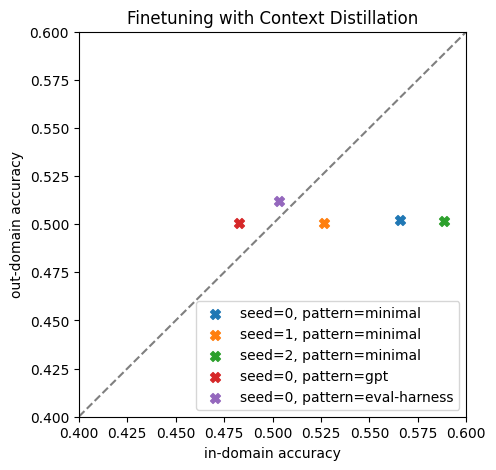

In [38]:
plt.figure(figsize=(5, 5))
plt.scatter(in_domain_acc_all[0], out_domain_acc_all[0], marker='X', s=50, label='seed=0, pattern=minimal')
plt.scatter(in_domain_acc_all[1], out_domain_acc_all[1], marker='X', s=50, label='seed=1, pattern=minimal')
plt.scatter(in_domain_acc_all[2], out_domain_acc_all[2], marker='X', s=50, label='seed=2, pattern=minimal')
plt.scatter(in_domain_acc_all[3], out_domain_acc_all[3], marker='X', s=50, label='seed=0, pattern=gpt')
plt.scatter(in_domain_acc_all[4], out_domain_acc_all[4], marker='X', s=50, label='seed=0, pattern=eval-harness')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlim(0.4, 0.6)
plt.ylim(0.4, 0.6)
plt.title("Finetuning with Context Distillation")
plt.xlabel("in-domain accuracy")
plt.ylabel("out-domain accuracy")
# plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')
plt.show()

# Testing with GPT

In [ ]:
# FT+ experiment (context distillation with language model head)
# args: task_name, max_train_samples, epochs, warmup_ratio, bsz, num_gpus, learning_rate, model_name_or_path, port
#bash $PROJECT_DIR/scripts/pattern_verbalizer_ft/mnli/run.sh mnli 128 40 0.5 4 8 1e-5 facebook/opt-13b 60000

import os
os.environ['PROJECT_DIR']="/content/drive/Othercomputers/My Computer/GoogleDrive/cs7643-prj-0407/llmft"
# os.environ['PROJECT_DIR']="/content/drive/MyDrive/Colab-Notebooks/cs7643-prj/llmft"
# os.environ['WANDB_DISABLED']='False'

!python "${PROJECT_DIR}/ft.py" \
            --wandb_project_name llmft-experiments \
            --wandb_group_name vanilla-ft \
            --model_name_or_path facebook/opt-125m \
            --cache_dir "./hf_model" \
            --task_name mnli \
            --pattern "{text1} question: {text2} Yes or No? answer:" \
            --target_tokens "Ġ1,Ġ0" \
            --dataset_cache_dir "./hf_dataset" \
            --max_seq_length 256 \
            --output_dir "./output" \
            --overwrite_output_dir \
            --do_train \
            --max_train_samples 16 \
            --per_device_train_batch_size 16 \
            --gradient_accumulation_steps 1 \
            --num_train_epochs 50 \
            --warmup_ratio 0.5 \
            --logging_first_step false \
            --logging_steps -1 \
            --learning_rate 1e-4 \
            --weight_decay 0.0 \
            --do_eval \
            --evaluation_strategy epoch \
            --per_device_eval_batch_size 32 \
            --eval_on_hans \
            --save_strategy no \
            --fp16 \
            --seed 0 \
            --data_seed 0 \
            --report_to "none" \
            2> "${PROJECT_DIR}/console.err"


[2024-04-28 13:05:02,846] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  async_io: please install the libaio-dev package with apt
 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH
 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.2
 [WARNING]  using untested triton version (2.2.0), only 1.0.0 is known to be compatible
Sample 12 of the training set: {'premise': 'and it is really really good about the um Saudis and just tracking their families and the Arabian culture', 'hypothesis': 'It often loses track of certain Saudis.', 'label': 321, 'idx': 275133, 'input_ids': [2, 463, 24, 16, 269, 269, 205, 59, 5, 7252, 20313, 8,